In [1]:
import numpy as np
import os
import time
import scipy
import glob
import sys
from datetime import datetime
import matplotlib as mpl
mpl.use('nbagg')
import seaborn as sns
import pylab as pl

import importlib

import pandas as pd
from scipy.stats import binned_statistic_2d

# import some custom funcs
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utils as util
import behavior as butil

In [2]:
importlib.reload(util)

<module 'utils' from '/Users/julianarhee/Repositories/plume-tracking/utils.py'>

In [3]:
util.set_sns_style(style='dark')

## load data

In [4]:
root_dir = '/Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data'
#experiment = 'Spontaneous_edge_tracking'
experiment = 'hdeltac/csv'
# experiment = 'hdeltac'
# 'hdeltac/csv/20220517_hdc_split_60d05_sytgcamp7f'
src_dir = os.path.join(root_dir, experiment)
# src_dir = '/Users/julianarhee/Documents/rutalab/data/test'
print(src_dir)
fig_id = os.path.join(root_dir.split('/My Drive')[1], experiment)
save_dir = '/Users/julianarhee/Documents/rutalab/data/figures/{}'.format(experiment)
save_dir = save_dir.replace(" ", "")
print(save_dir)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

/Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data/hdeltac/csv
/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/csv


In [5]:
log_files = sorted(glob.glob(os.path.join(src_dir, '2022*', 'et', '*.csv')), \
                   key=util.natsort)
#log_files = sorted(glob.glob(os.path.join(src_dir, '*.log')), key=util.natsort)
print("Found {} raw .log behavior files.".format(len(log_files)))

for fi, fpath in enumerate(log_files):
    dfn = fpath.split('/hdeltac/csv/')[1].split('/et')[0]
    print(fi, dfn)

Found 7 raw .log behavior files.
0 20220517_hdc_split_60d05_sytgcamp7f
1 20220627_hdc_split_Fly1
2 20220627_hdc_split_Fly2
3 20220628_HDC_sytjGCaMP7f_Fly1
4 20220628_HDC_sytjGCaMP7f_Fly1_45-004
5 20220629_HDC_split_sytjGCaMP7f_Fly1
6 20220629_HDC_split_sytjGCaMP7f_Fly3


In [6]:
%matplotlib notebook

# plot trajectories

In [7]:
strip_width=10
# odor_borders = butil.get_odor_grid_all_flies(df0, strip_width=strip_width)

In [8]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

In [9]:
excluded = ['20220628_HDC_sytjGCaMP7f_Fly1_45-004']

In [18]:
is_csv = True
d_list = []
# load all the data
for fi, fpath in enumerate(log_files):
    # load data
    if is_csv:
        df_ = butil.load_dataframe_resampled_csv(fpath)
    else:
        df_ = butil.load_dataframe(fpath) 
    if df_ is None:
        print("error:", fn)
        continue
    #odor params
    fname = fpath.split('csv/')[1].split('/et')[0]
    df_['fly_id'] = fname
    df_['condition'] = 'stripgrid'
    df_ = butil.process_df(df_)
    
    d_list.append(df_)
df0 = pd.concat(d_list)
df0['trial_id'] = ['_'.join([fly_id, cond]) for (fly_id, cond) \
                   in df0[['fly_id', 'condition']].values]


In [19]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

In [20]:
fly_ids = df0['fly_id'].unique()

In [ ]:
odor_borders = butil.get_odor_grid_all_flies(df0, strip_width=strip_width)

<IPython.core.display.Javascript object>


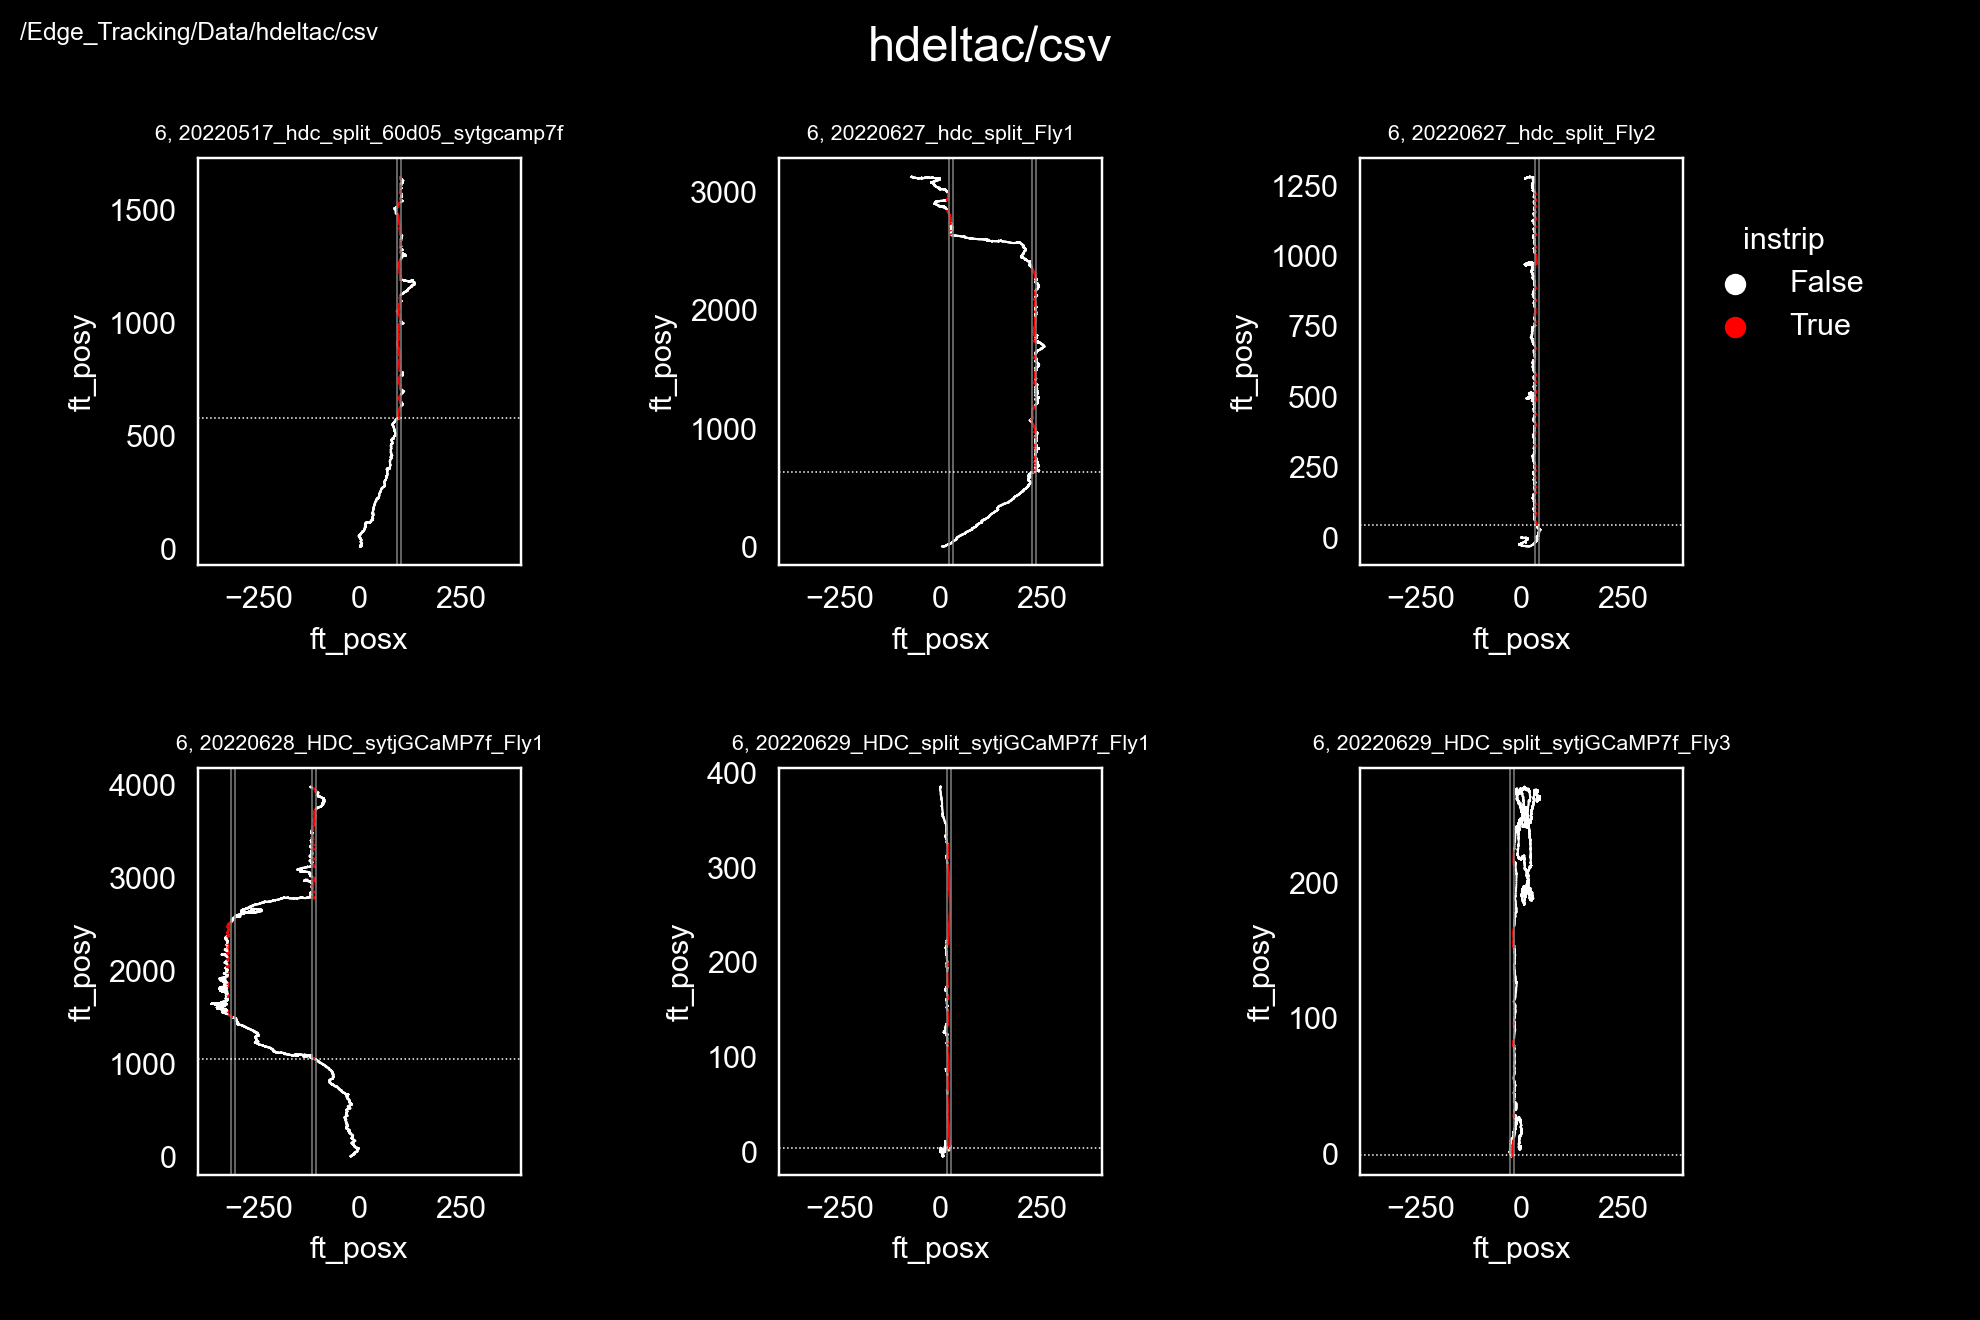

In [43]:
hue_varname='instrip'
palette='cool'
start_at_odor = False
strip_width=10
odor_lc='lightgray'
odor_lw=0.5
nrows = 2
ncols = 3
palette={True: 'r', False: 'w'}

xmin, xmax = (-500, 500)
ymin, ymax = (-100, 1000)
odor_xmin, odor_xmax = (-100, 100)
fig, axes = pl.subplots(nrows, ncols, sharex=False, sharey=False, figsize=(ncols*3, nrows*3))
ai = 0
#for fi, fpath in enumerate(log_files):
for fly_id, df_ in df0.groupby('fly_id'):
    odor_params = butil.get_odor_params(df_, strip_width=strip_width, is_grid=True)
    plotdf = df_[df_['time']>=odor_params['odor_start_time']] if start_at_odor else df_
    # set subplot
    if fly_id in excluded:
        continue
    ax = axes.flat[ai]
    butil.plot_trajectory(plotdf, ax=ax,hue_varname=hue_varname, palette=palette,
                         odor_bounds=odor_params['odor_boundary'], plot_legend=True)
    if ai==ncols-1:
        ax.legend(bbox_to_anchor=(0.98, 0.9), ncol=1,
                  loc='upper left', title=hue_varname, frameon=False) 
    else:
        ax.legend_.remove()  
    title = '{}, {}'.format(fi, fly_id)
    ax.set_title(title, fontsize=7)
    ax.set_xlim([-400, 400])
    ai+=1
# remove unused axes
for ix in np.arange(fi+1, nrows*ncols):
    axes.flat[ix].axis('off')
# adjust plots
pl.subplots_adjust(hspace=0.5, wspace=0.8, left=0.1, right=0.85)
fig.suptitle(experiment, fontsize=16)
util.label_figure(fig, fig_id)
figname = 'traj_all_flies'
pl.savefig(os.path.join(save_dir, '{}.png'.format(figname)))

## flip trajectories to face same edge

In [27]:
odor_borders = butil.get_odor_grid_all_flies(df0, strip_width=strip_width)

/Users/julianarhee/Repositories/plume-tracking/behavior.py:801: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for trial_id, currdf in df0.groupby(['trial_id']):


In [40]:
d_list=[]
odor_borders_fp={}
for trial_id, df_ in df0.groupby('trial_id'):
    oparams = butil.get_odor_params(df_) 
    odict = odor_borders[trial_id]
    for (k, v), olist in zip(odict.items(), [oparams['odor_boundary']]):
        odict[k] = olist
    df_copy, new_borders = butil.check_entryside_and_flip(df_, strip_width=strip_width,
                                                      odor_dict=odict)
    d_list.append(df_copy)
    odor_borders_fp[trial_id] = new_borders
df_fp = pd.concat(d_list)

<IPython.core.display.Javascript object>


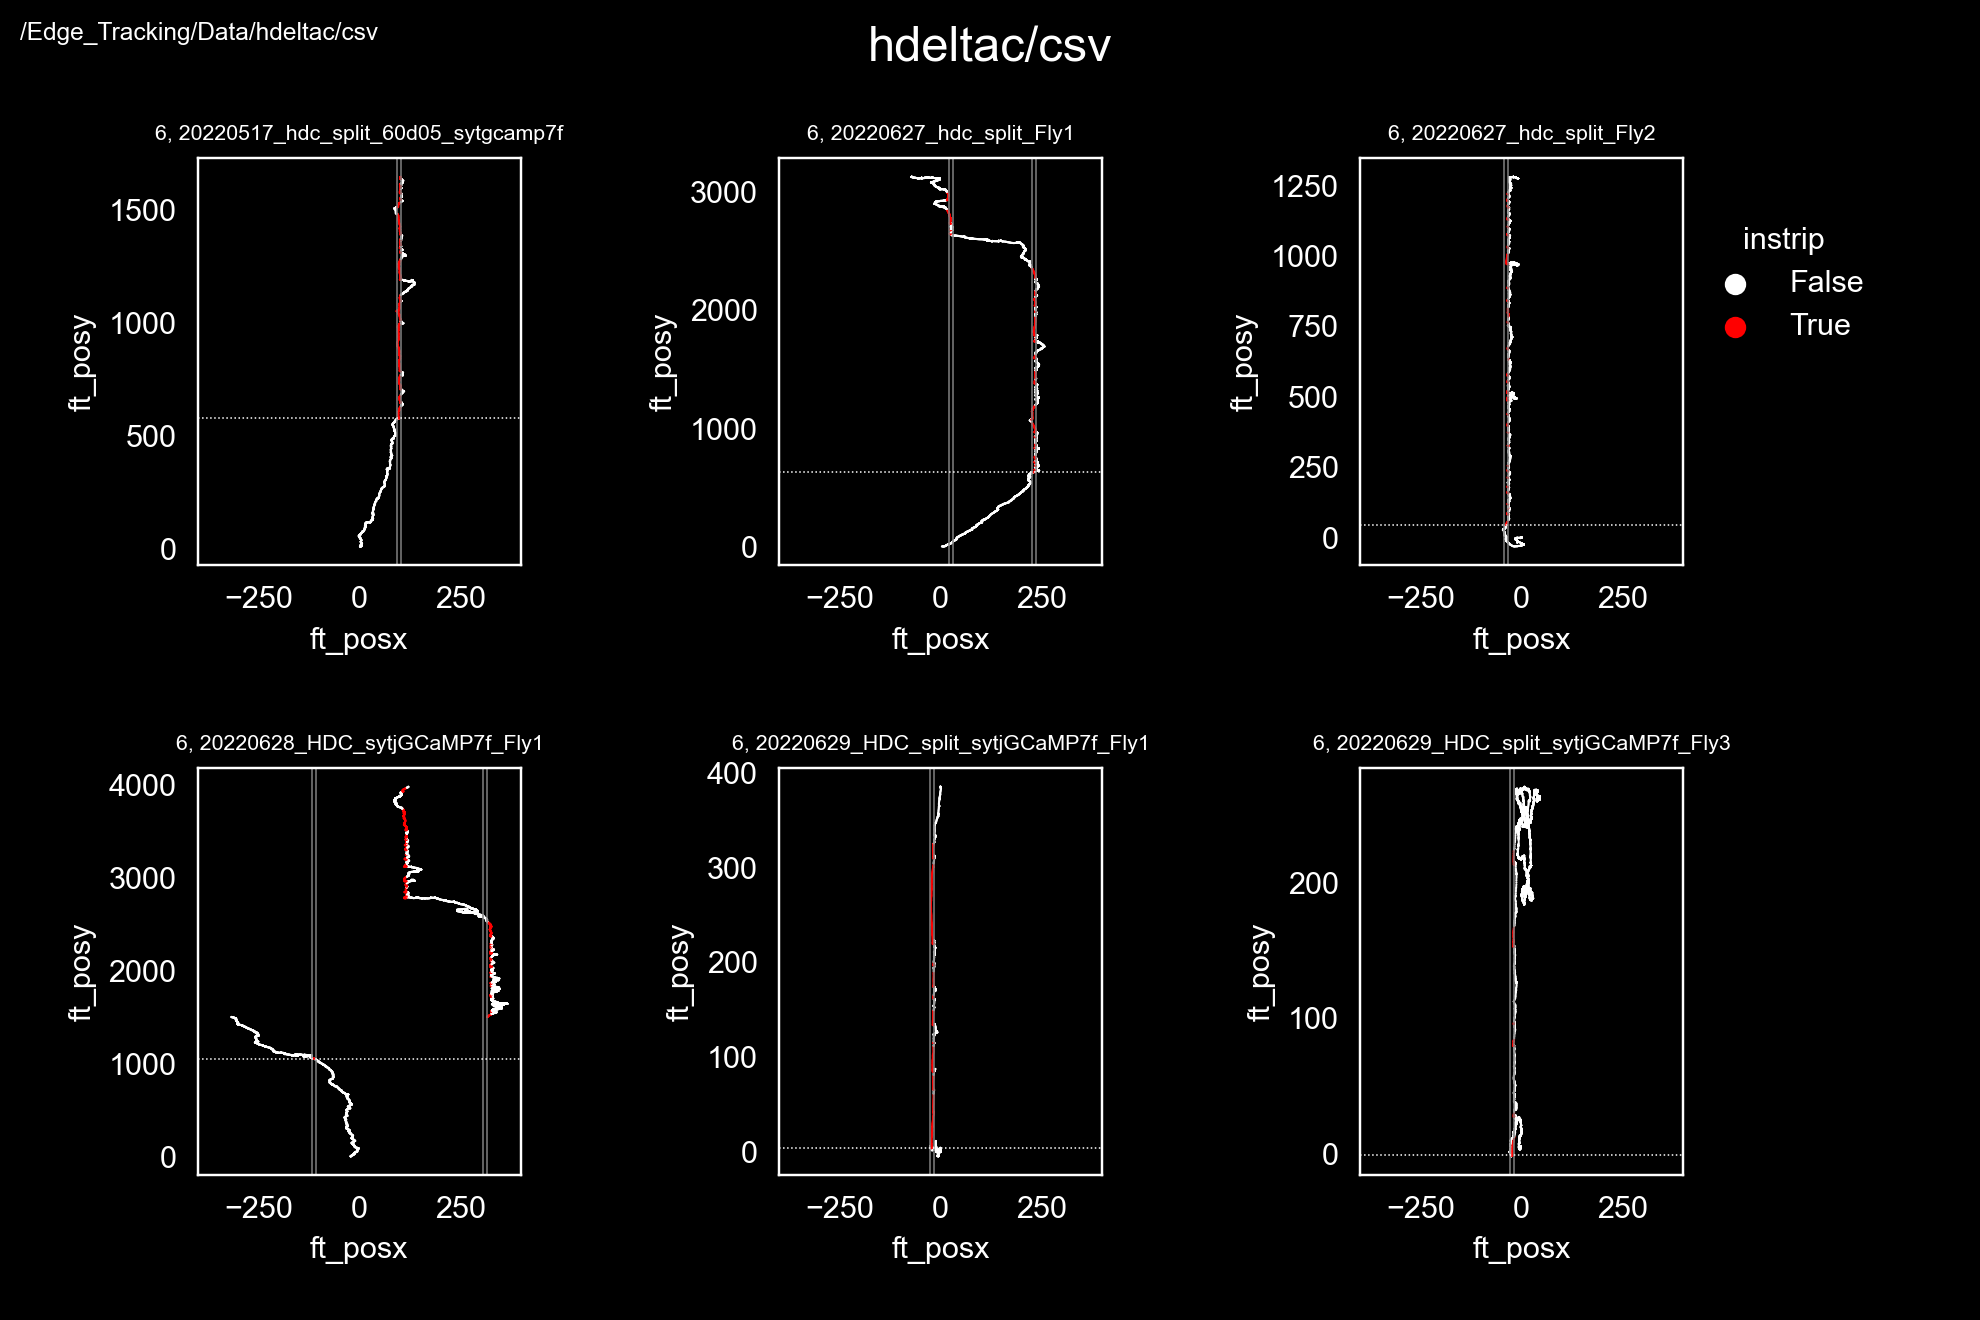

In [44]:
hue_varname='instrip'
palette='cool'
start_at_odor = False
strip_width=10
odor_lc='lightgray'
odor_lw=0.5
nrows = 2
ncols = 3
palette={True: 'r', False: 'w'}

xmin, xmax = (-500, 500)
ymin, ymax = (-100, 1000)
odor_xmin, odor_xmax = (-100, 100)
fig, axes = pl.subplots(nrows, ncols, sharex=False, sharey=False, figsize=(ncols*3, nrows*3))
ai = 0
#for fi, fpath in enumerate(log_files):
for fly_id, df_ in df_fp.groupby('fly_id'):
    odor_params = butil.get_odor_params(df_, strip_width=strip_width, is_grid=True)
    plotdf = df_[df_['time']>=odor_params['odor_start_time']] if start_at_odor else df_
    # set subplot
    if fly_id in excluded:
        continue
    ax = axes.flat[ai]
    butil.plot_trajectory(plotdf, ax=ax,hue_varname=hue_varname, palette=palette,
                         odor_bounds=odor_params['odor_boundary'], plot_legend=True)
    if ai==ncols-1:
        ax.legend(bbox_to_anchor=(0.98, 0.9), ncol=1,
                  loc='upper left', title=hue_varname, frameon=False) 
    else:
        ax.legend_.remove()  
    title = '{}, {}'.format(fi, fly_id)
    ax.set_title(title, fontsize=7)
    ax.set_xlim([-400, 400])
    ai+=1
# remove unused axes
for ix in np.arange(fi+1, nrows*ncols):
    axes.flat[ix].axis('off')
# adjust plots
pl.subplots_adjust(hspace=0.5, wspace=0.8, left=0.1, right=0.85)
fig.suptitle(experiment, fontsize=16)
util.label_figure(fig, fig_id)
figname = 'traj_all_flies_flipped'
pl.savefig(os.path.join(save_dir, '{}.png'.format(figname)))

### RDP

##### sanity check with 1 fly

In [45]:
fly_ids

array(['20220517_hdc_split_60d05_sytgcamp7f', '20220627_hdc_split_Fly1',
       '20220627_hdc_split_Fly2', '20220628_HDC_sytjGCaMP7f_Fly1',
       '20220628_HDC_sytjGCaMP7f_Fly1_45-004',
       '20220629_HDC_split_sytjGCaMP7f_Fly1',
       '20220629_HDC_split_sytjGCaMP7f_Fly3'], dtype=object)

In [229]:
fly_id = '20220517_hdc_split_60d05_sytgcamp7f'
df_ = df_fp[df_fp['fly_id']==fly_id].copy()

In [230]:
smooth = False
xvar='smoothed_ft_posx' if smooth else 'ft_posx'
yvar='smoothed_ft_posy' if smooth else 'ft_posy'
smooth_window=11
rdp_epsilon=1 #0.5 # distance unit (usually, 1mm)
# for varname in ['ft_posx', 'ft_posy']:
#     df = butil.smooth_traces(df, varname=varname, window_size=smooth_window)
# df = butil.smooth_path(df, s=10)
df_ = butil.smooth_traces(df_, window_size=smooth_window, return_same=True)
df_ = butil.add_rdp_by_bout(df_, epsilon=rdp_epsilon, xvar=xvar, yvar=yvar)

In [231]:
# df['trial_id'] = ['_'.join([fly_id, cond]) for (fly_id, cond) in df[['fly_id', 'condition']].values]
df_ = butil.get_speed_and_stops(df_, speed_thresh=speed_thresh, stopdur_thresh=stopdur_thresh)
meandirs = butil.mean_dir_after_stop(df_,
                                    theta_range=theta_range, heading_var='heading')

In [232]:
bnum = 15
b_ = df_[df_['boutnum']==bnum].copy()
theta_range = (-np.pi, np.pi)


<IPython.core.display.Javascript object>


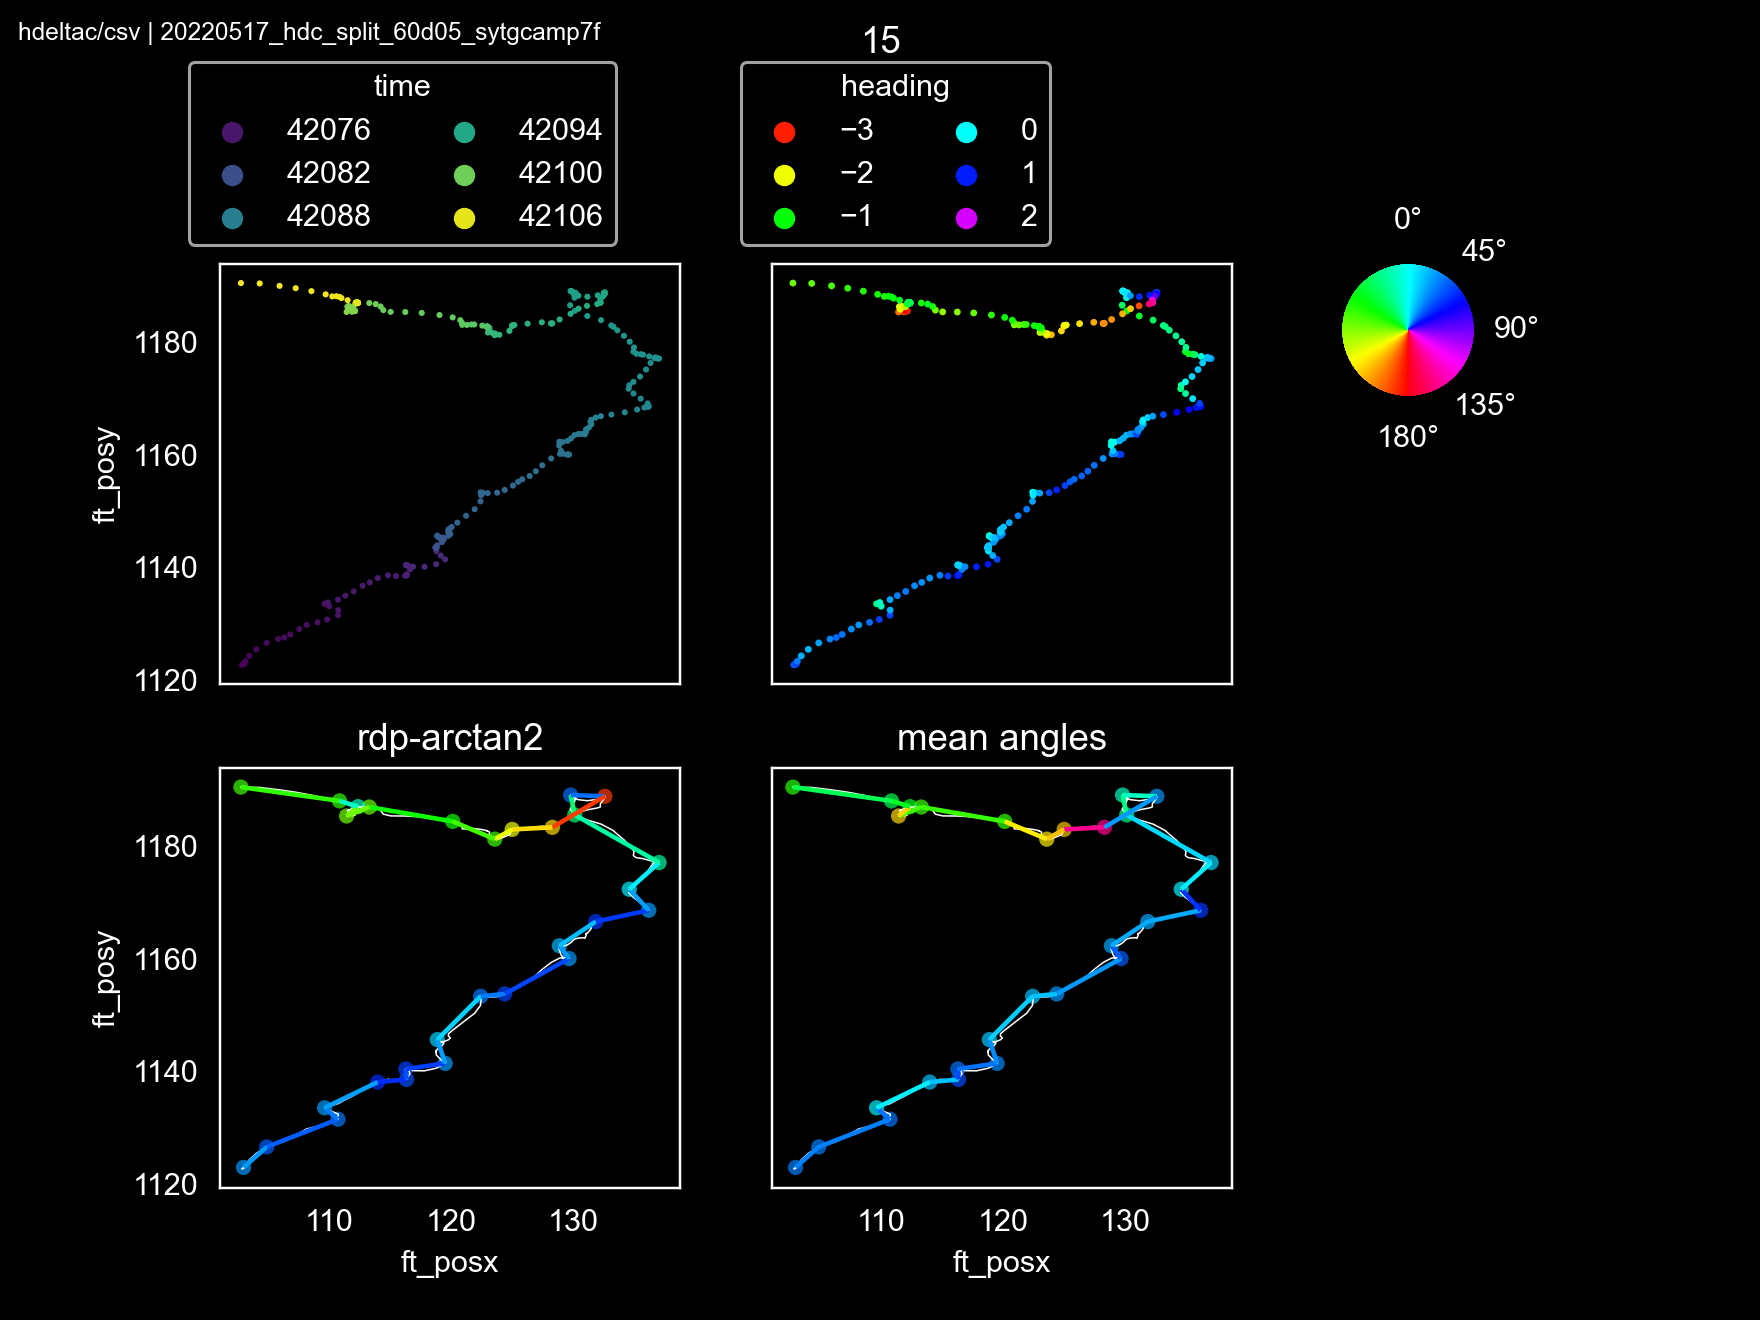

In [233]:
fig = butil.examine_heading_in_bout(b_, theta_range=theta_range, 
                                xvar=xvar, yvar=yvar, heading_var_og='heading' ,
                                    heading_var='heading')
fig.suptitle(bnum)
pl.subplots_adjust(right=0.7, top=0.8, bottom=0.1)
util.label_figure(fig, '{} | {}'.format(experiment, fly_id))


#### heading at stops

In [234]:
bnum

15

<IPython.core.display.Javascript object>


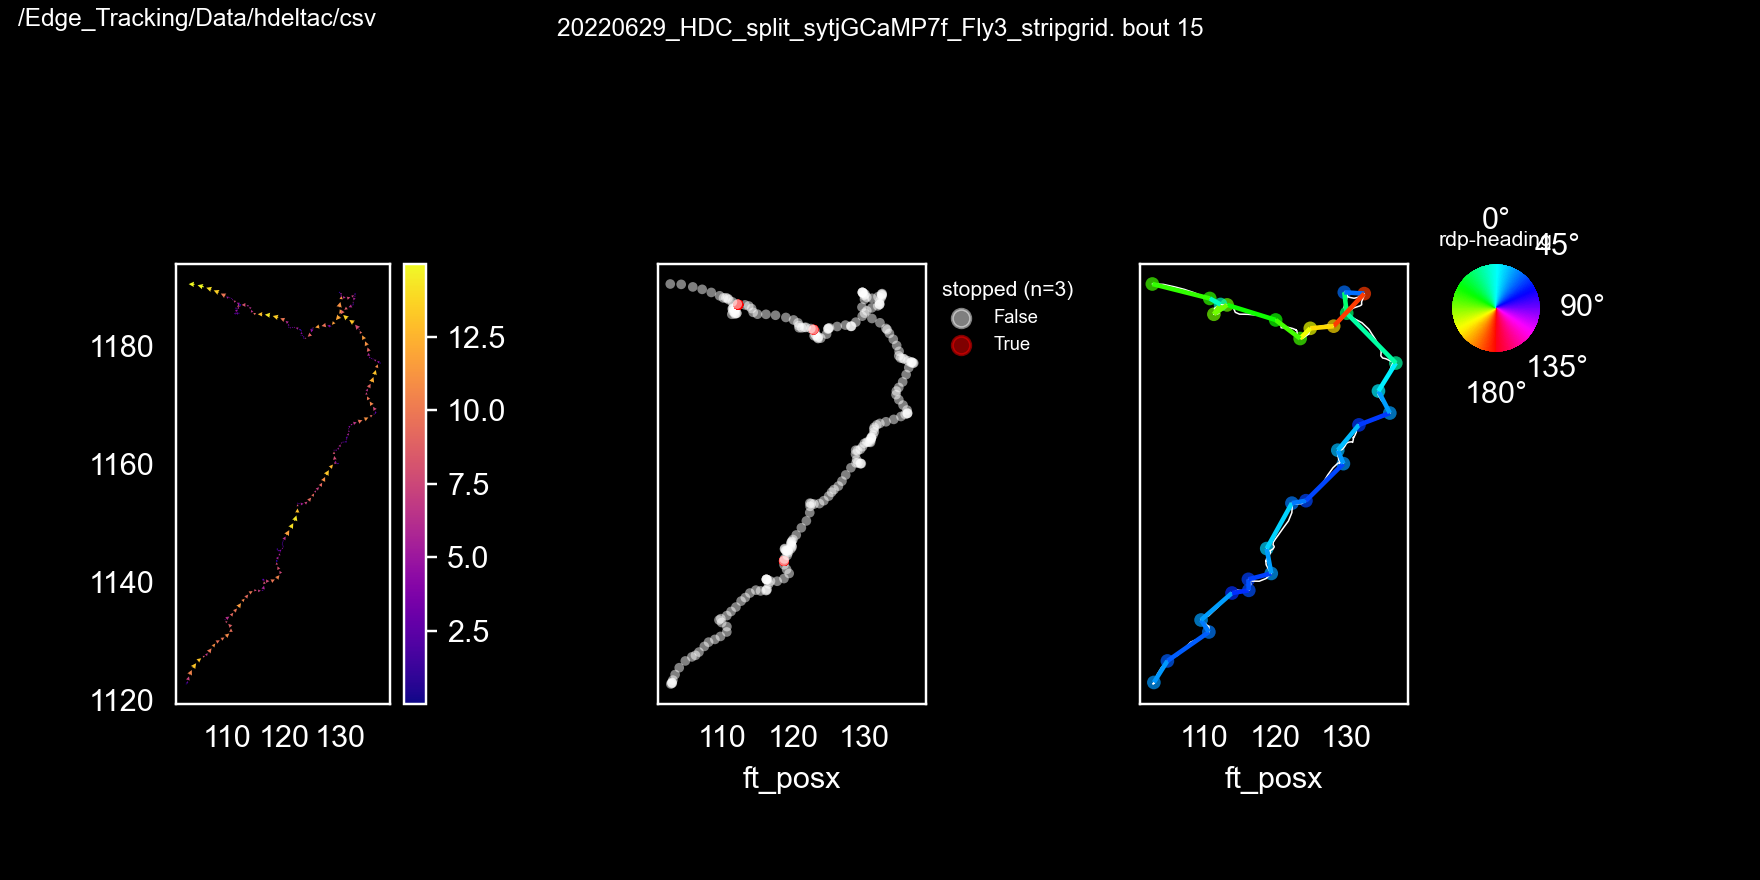

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/csv vector-heading-at-stops_20220629_HDC_split_sytjGCaMP7f_Fly3_stripgrid_bout15


In [242]:
use_vector_plot=True
bnum = 15
b_ = df_[df_['boutnum']==bnum].copy()
oparams = butil.get_odor_params(df_, strip_width=strip_width, is_grid=True)
# b_ = butil.calculate_stops(b_, stop_thresh=1.0, speed_varname='speed')
# b_ = butil.parse_bouts(b_, count_varname='stopped', bout_varname='stopboutnum')
# b_ = butil.filter_bouts_by_dur(b_, bout_thresh=stopdur_thresh, \
#                            count_varname='stopped', bout_varname='stopboutnum')
#b_ = butil.get_speed_and_stops(b_, speed_thresh=speed_thresh, stopdur_thresh=stopdur_thresh)
if use_vector_plot:
    fig = butil.examine_heading_at_stops_vectors(b_, scale=1.5)
    prefix='vector-'
else:
    fig = butil.examine_heading_at_stops(b_, xvar=xvar, yvar=yvar, theta_range=theta_range)
    prefix=''
pl.subplots_adjust(right=0.8, top=0.7, wspace=0.8, bottom=0.2, left=0.1)
fig.suptitle('{}. bout {}'.format(trial_id, bnum), fontsize=8)
util.label_figure(fig, fig_id)

figname = '{}heading-at-stops_{}_bout{}'.format(prefix, trial_id, bnum)
pl.savefig(os.path.join(save_dir, '{}.png'.format(figname)))
print(save_dir, figname)

### All bouts together

In [236]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

In [269]:
df_proc['fly_id'].unique()

array(['20220517_hdc_split_60d05_sytgcamp7f', '20220627_hdc_split_Fly1',
       '20220627_hdc_split_Fly2', '20220628_HDC_sytjGCaMP7f_Fly1_45-004',
       '20220628_HDC_sytjGCaMP7f_Fly1',
       '20220629_HDC_split_sytjGCaMP7f_Fly1',
       '20220629_HDC_split_sytjGCaMP7f_Fly3'], dtype=object)

<IPython.core.display.Javascript object>


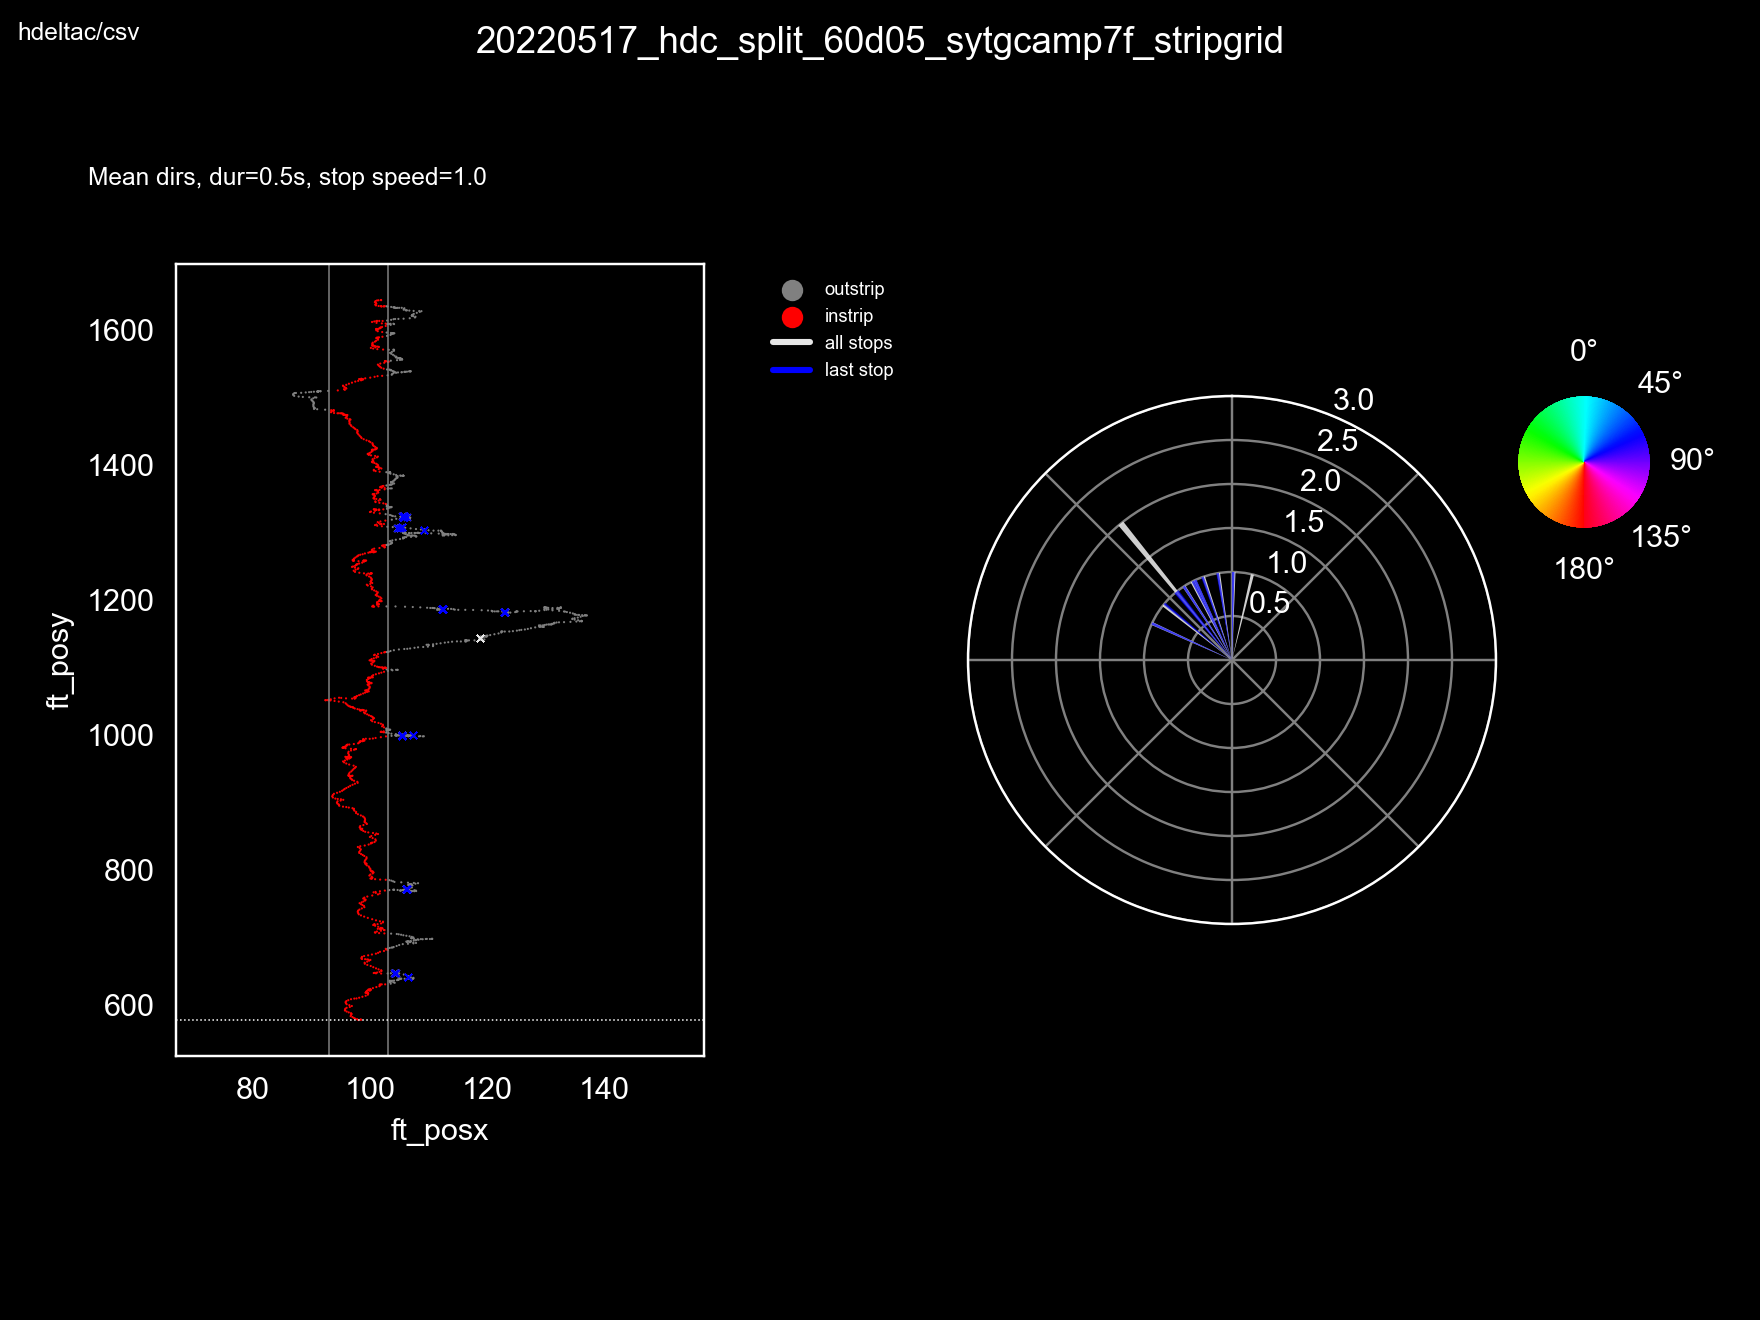

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/csv summary_heading-at-stop_20220517_hdc_split_60d05_sytgcamp7f_stripgrid


<IPython.core.display.Javascript object>


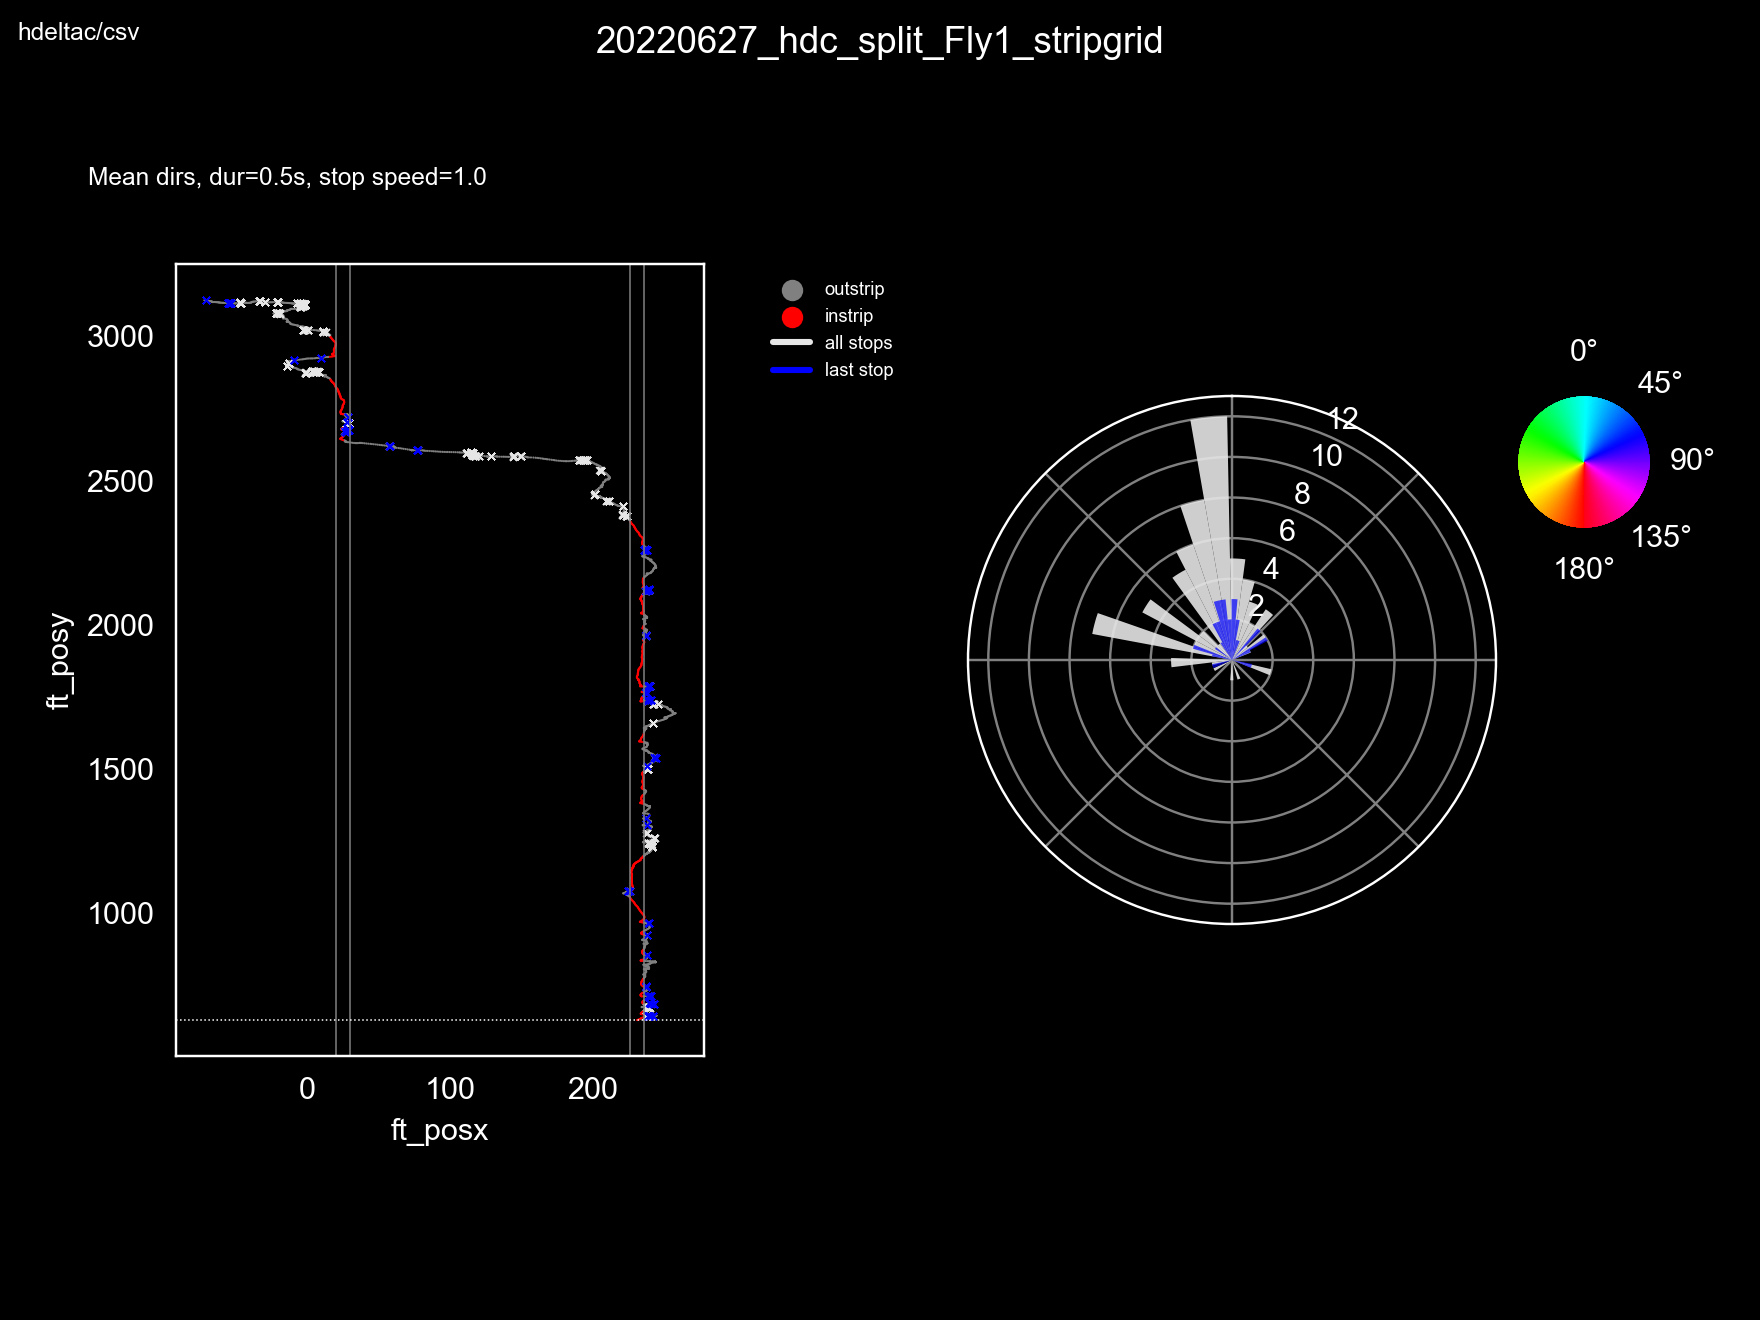

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/csv summary_heading-at-stop_20220627_hdc_split_Fly1_stripgrid


<IPython.core.display.Javascript object>


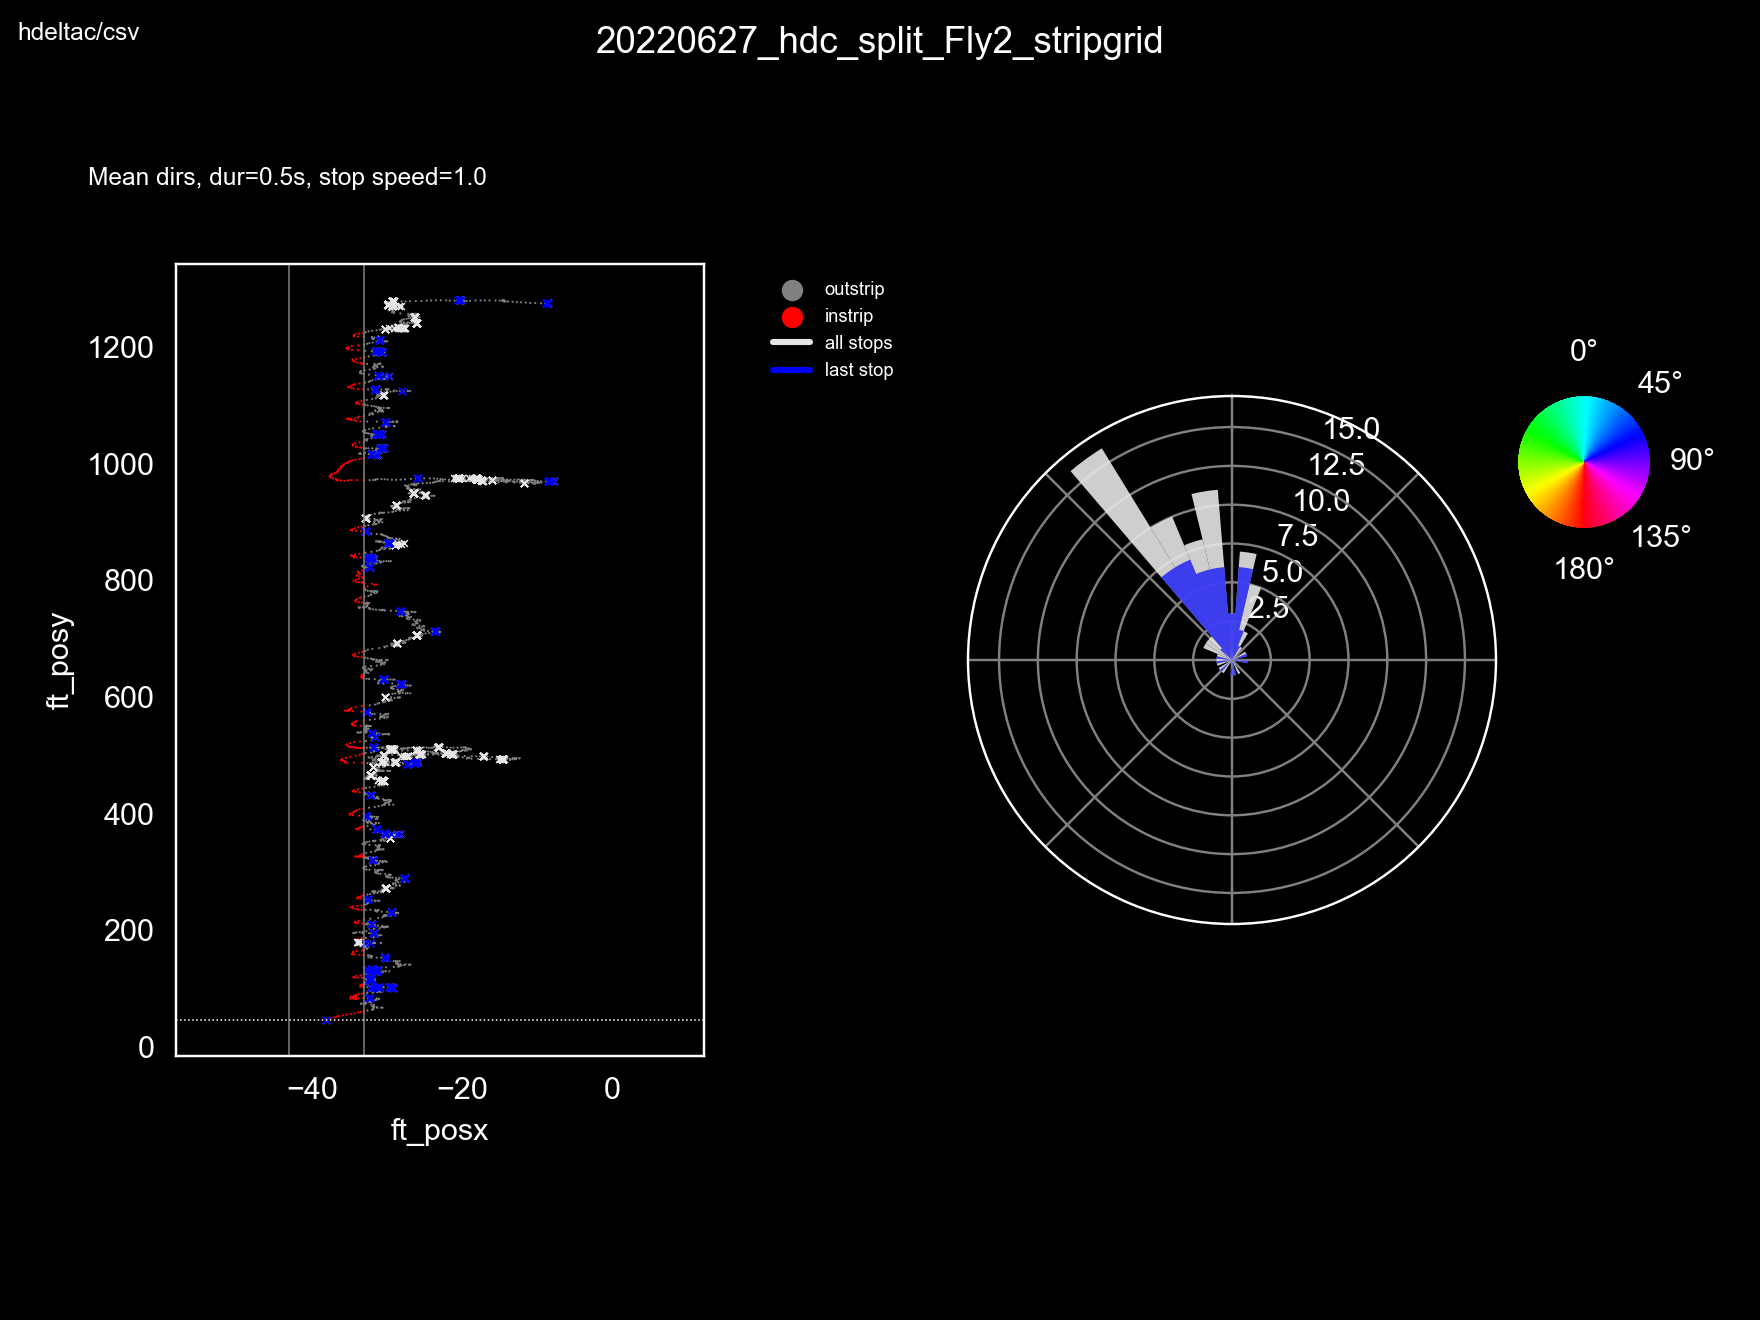

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/csv summary_heading-at-stop_20220627_hdc_split_Fly2_stripgrid


<IPython.core.display.Javascript object>


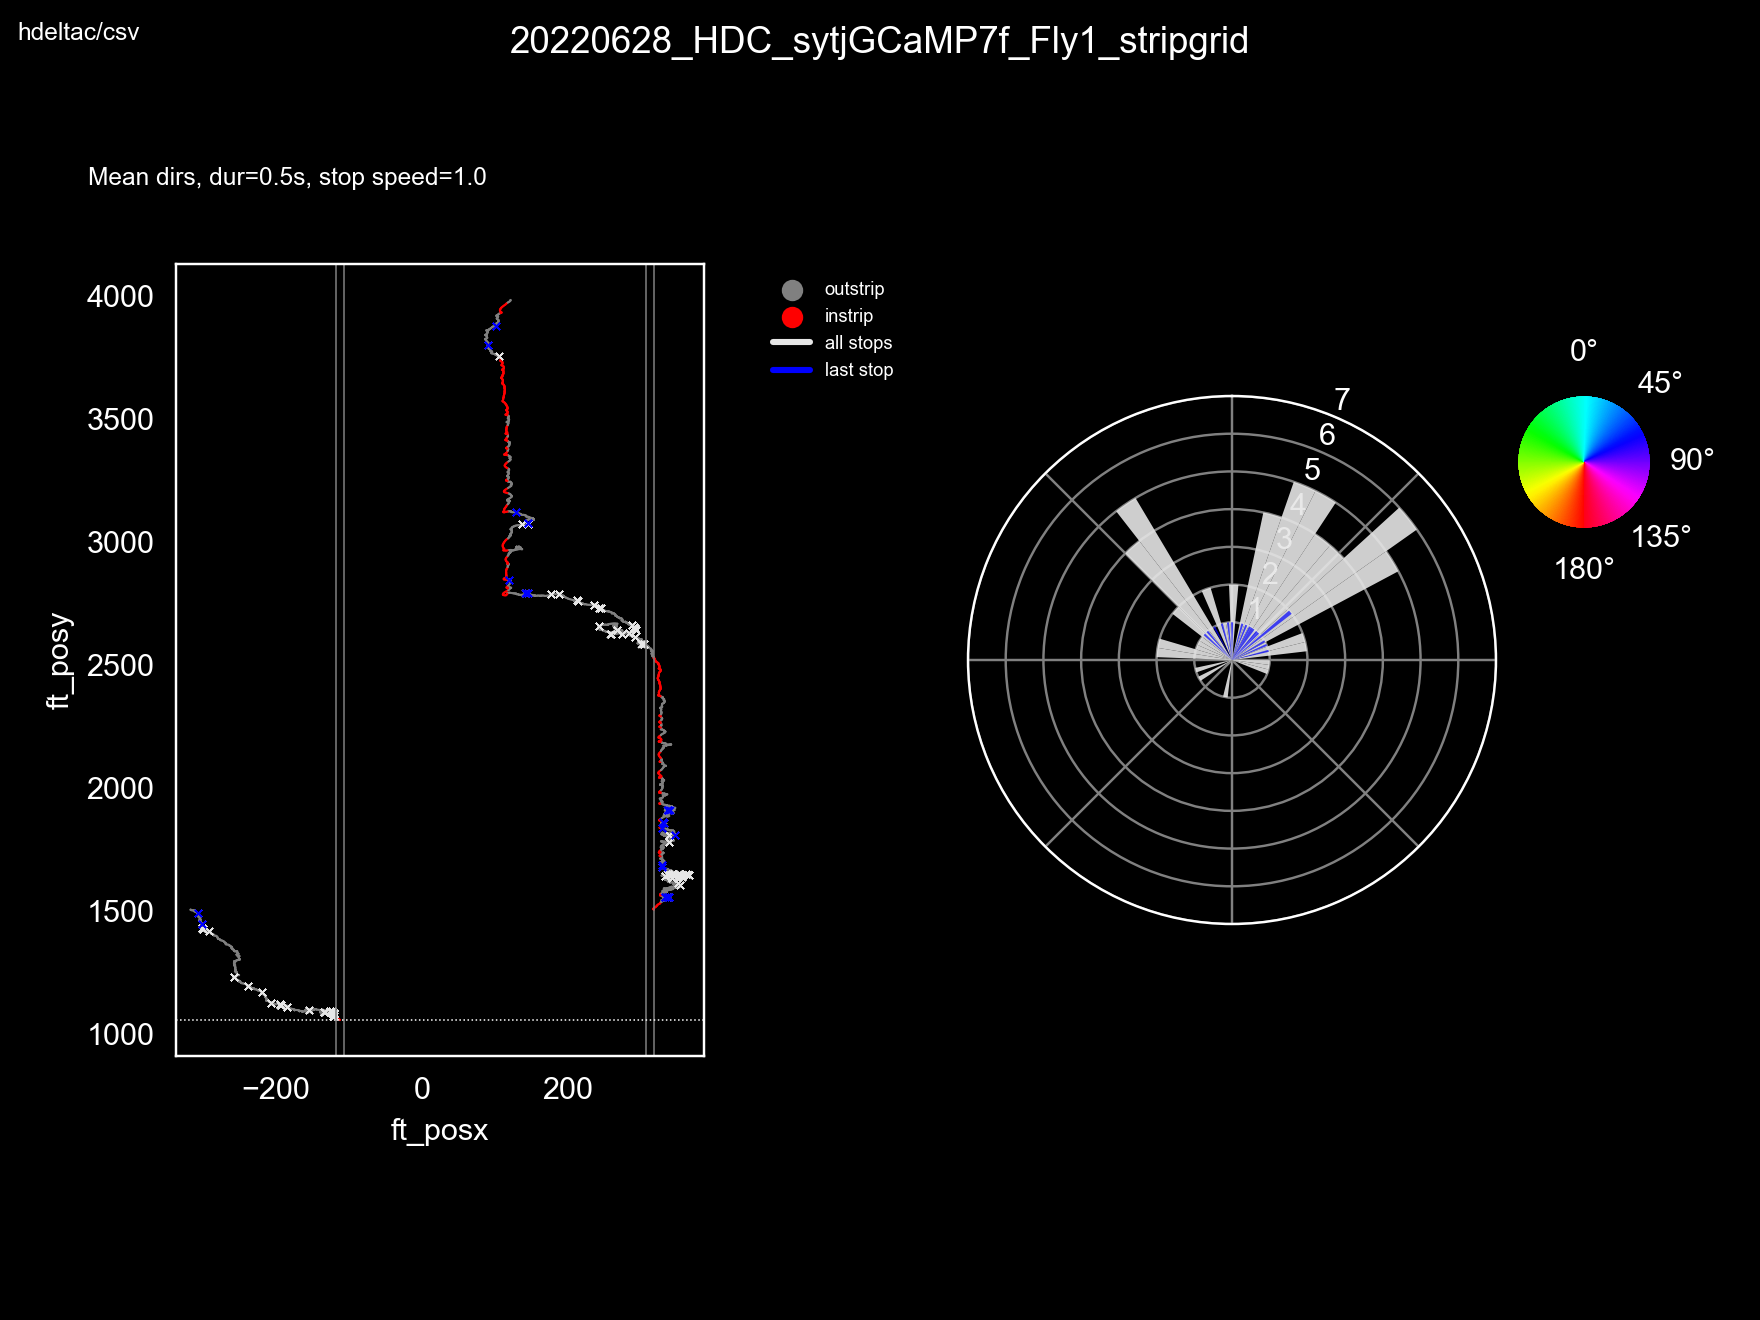

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/csv summary_heading-at-stop_20220628_HDC_sytjGCaMP7f_Fly1_stripgrid


<IPython.core.display.Javascript object>


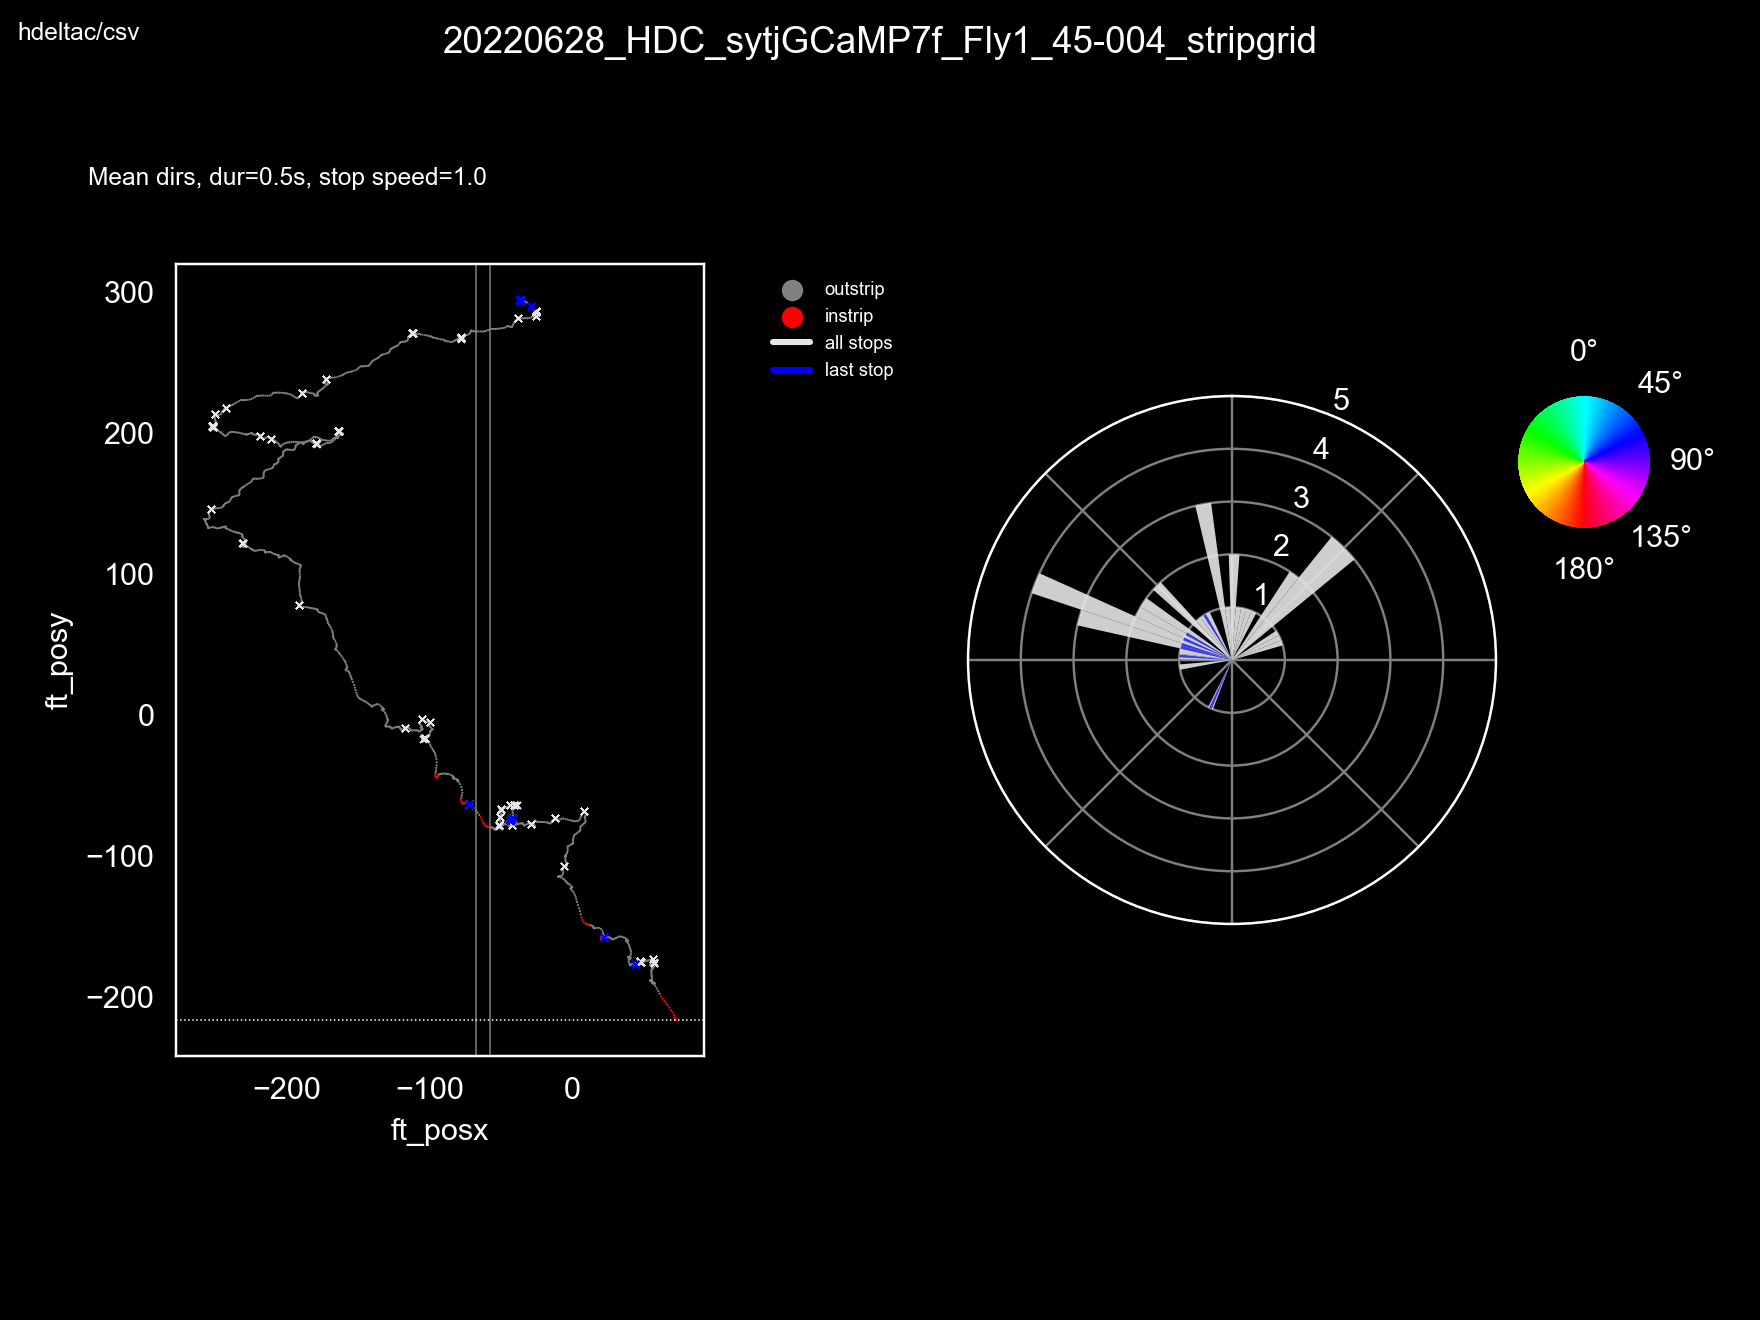

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/csv summary_heading-at-stop_20220628_HDC_sytjGCaMP7f_Fly1_45-004_stripgrid


<IPython.core.display.Javascript object>


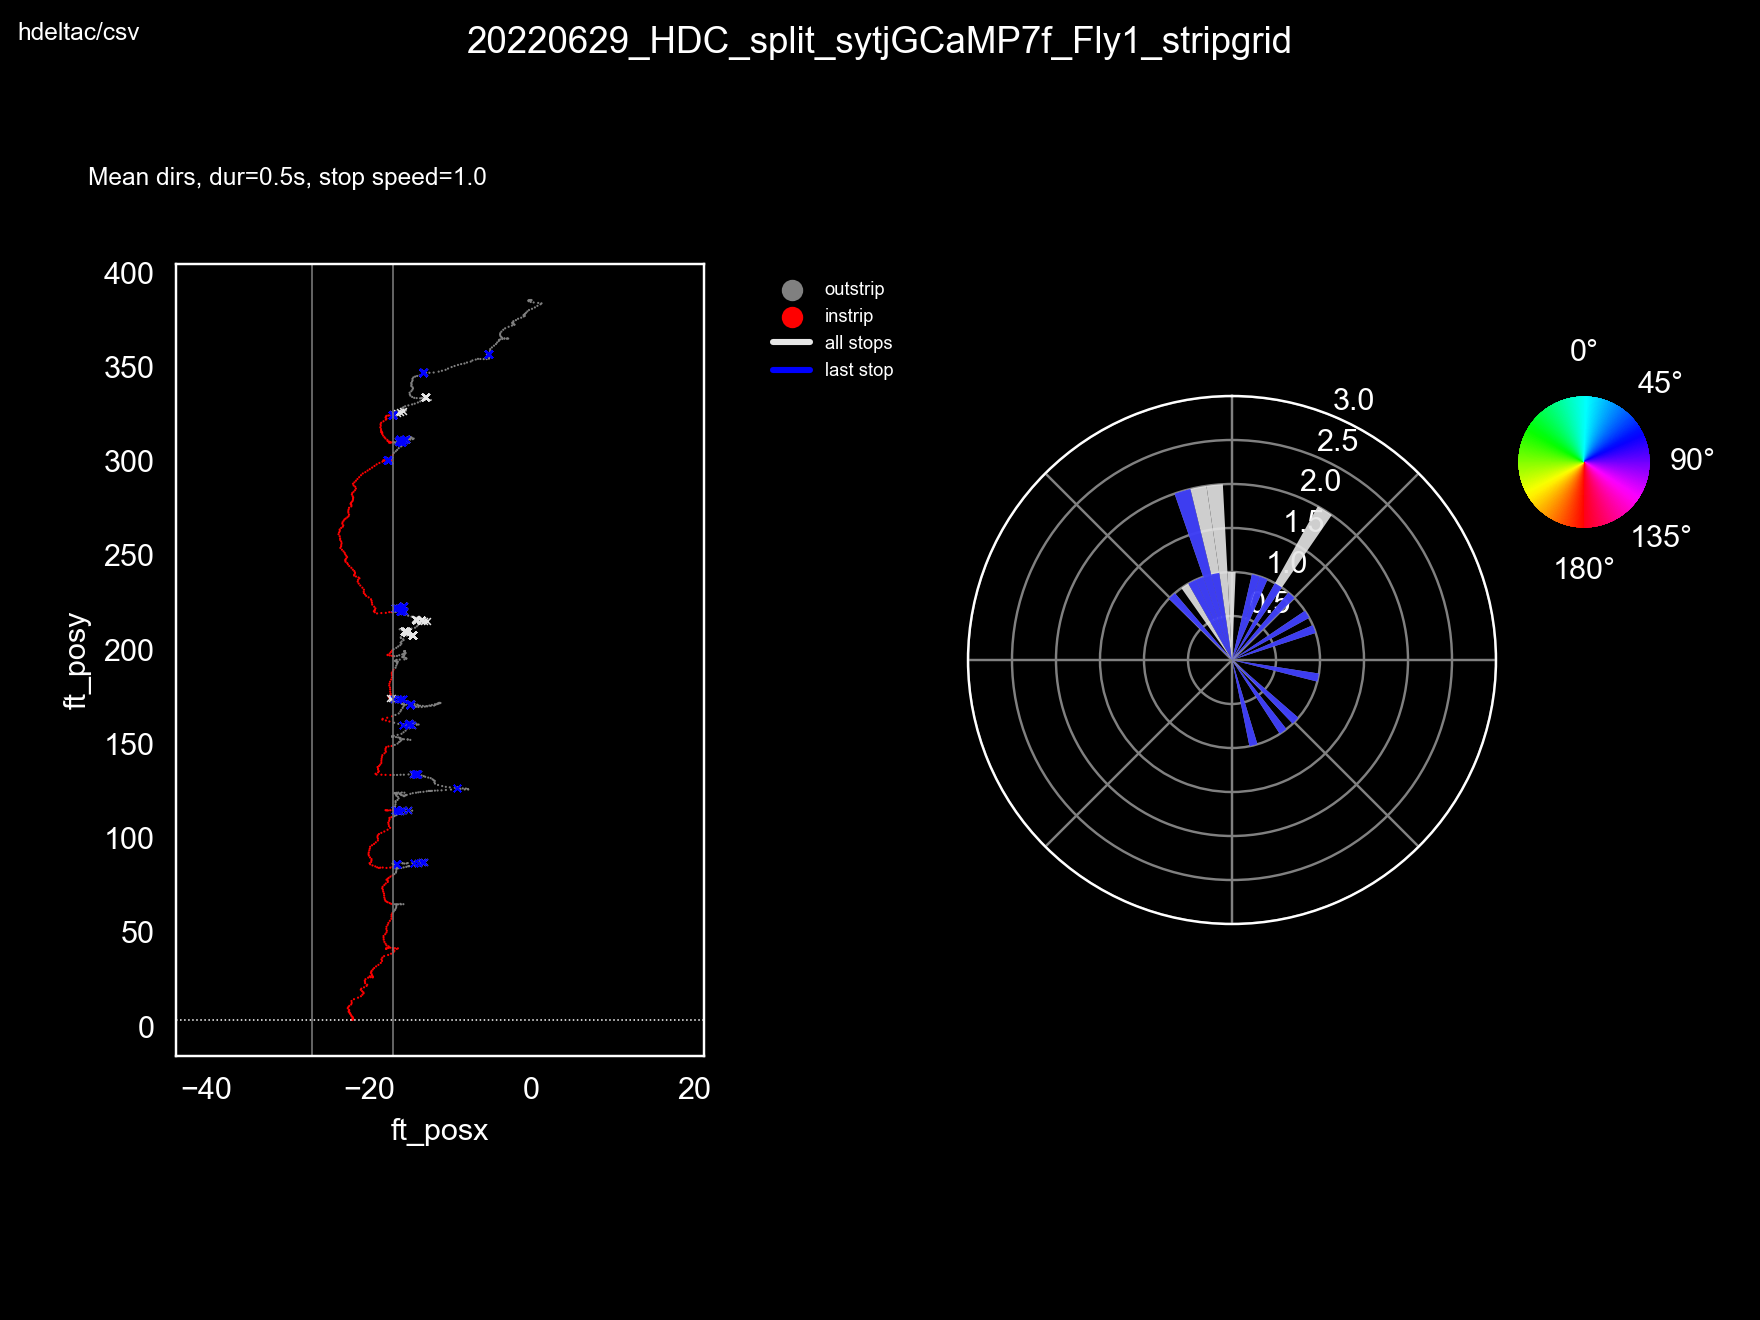

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/csv summary_heading-at-stop_20220629_HDC_split_sytjGCaMP7f_Fly1_stripgrid


<IPython.core.display.Javascript object>


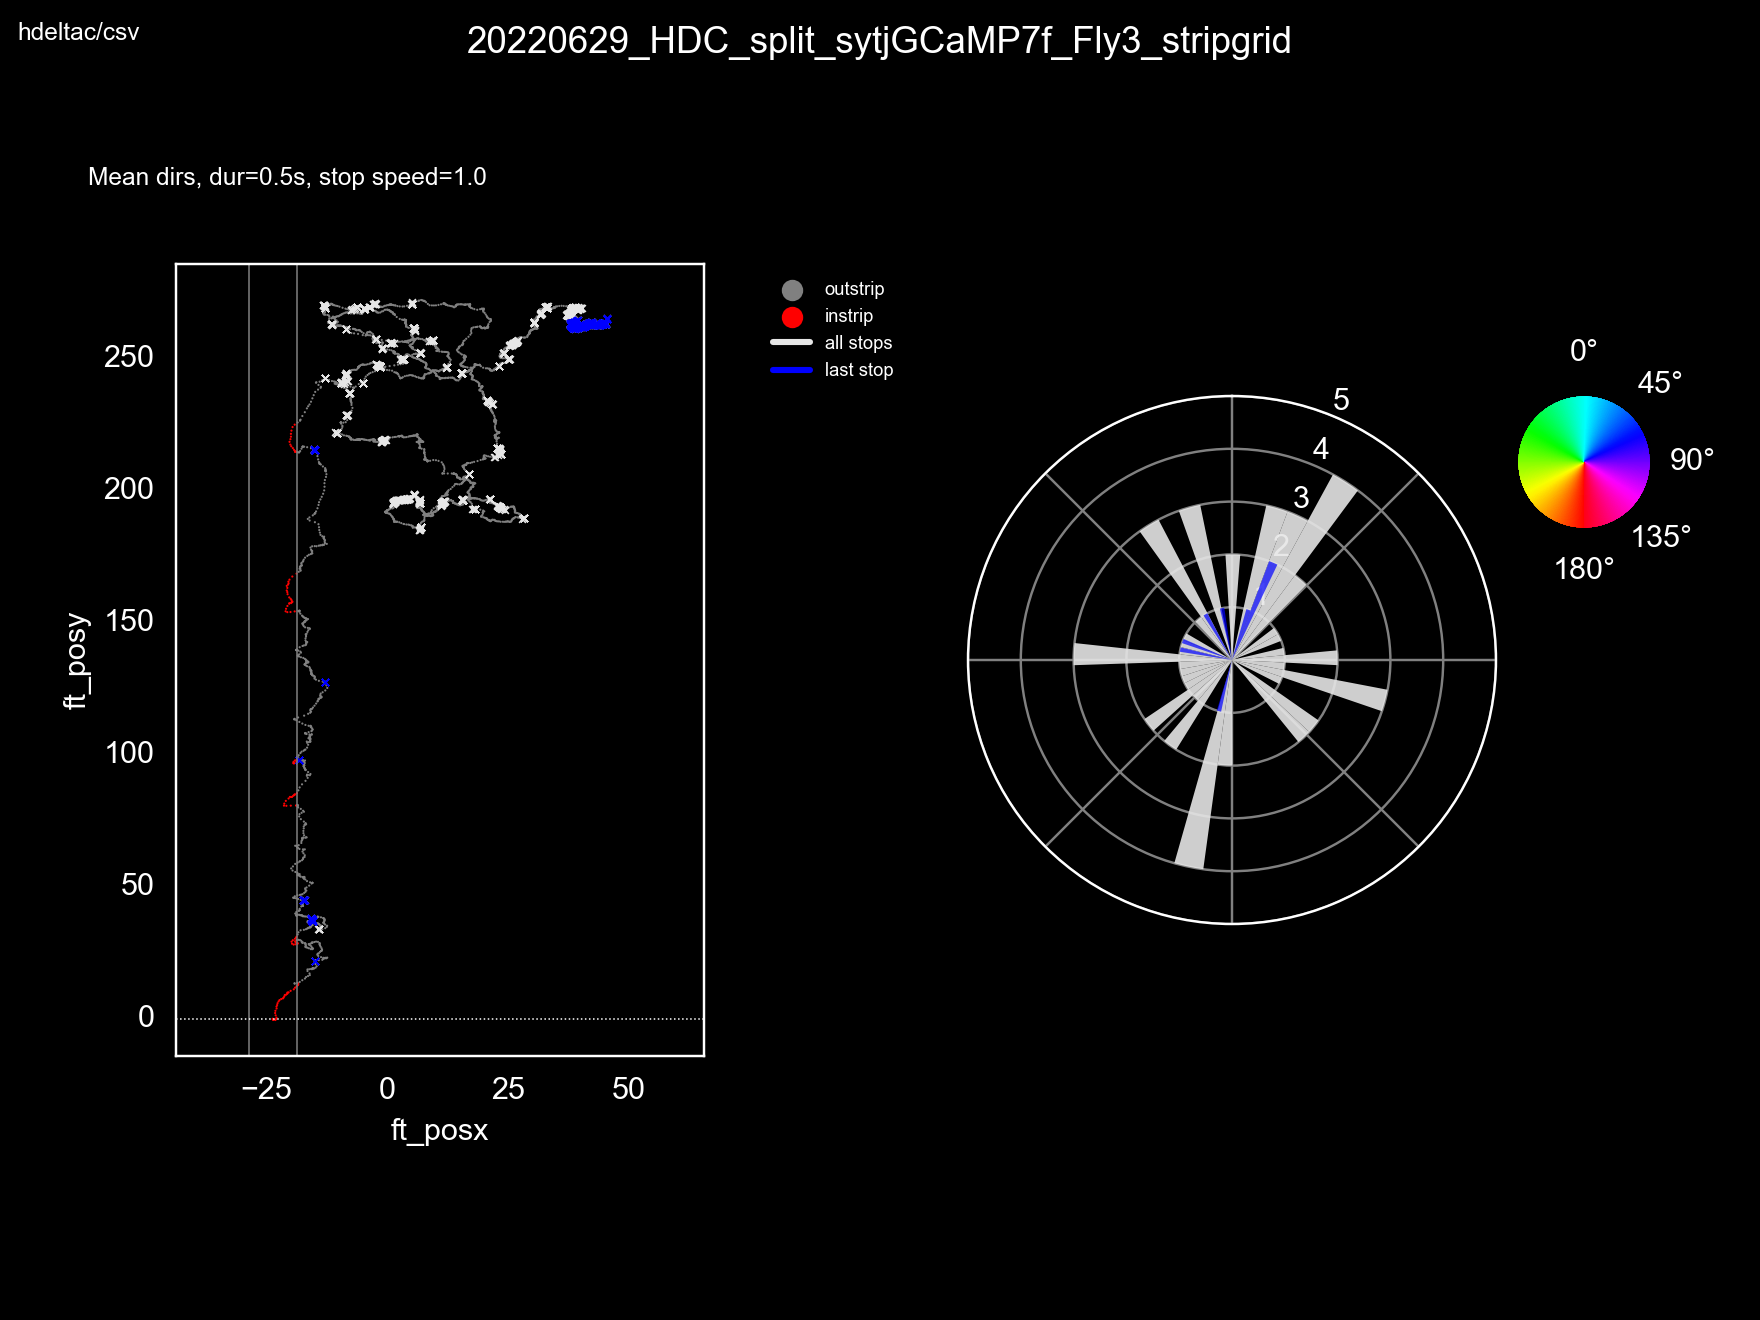

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/csv summary_heading-at-stop_20220629_HDC_split_sytjGCaMP7f_Fly3_stripgrid


In [271]:
#fly_id = '20220517-fly1'
instrip_palette={True: 'r', False: 'gray'}
laststop_color='blue'
stop_color = [0.9]*3
# -------

for fly_id, df_ in df_proc.groupby('fly_id'):
    meanangs_ = mdf[(mdf['fly_id']==fly_id) & (mdf['crosswind_dist']>=min_xwind_dist)].copy()
    last_ = last_stops[(last_stops['fly_id']==fly_id) 
                   & (last_stops['crosswind_dist']>=min_xwind_dist)].copy()
    #df_= df_proc[df_proc['fly_id']==fly_id].copy()
    trial_id = df_['trial_id'].unique()[0]
    
    df_['is_last'] = False
    for bnum, b_ in meanangs_.groupby('boutnum'):
        last_stopboutnums = b_[b_['is_last']]['stopboutnum'].unique()
        df_.loc[(df_['stopboutnum'].isin(last_stopboutnums))
                & (df_['boutnum']==bnum), 'is_last'] = True
    # plot
    fig = butil.summarize_stops_and_turns(df_, meanangs_, last_,
                        theta_range=(-np.pi, np.pi),theta_cmap='hsv',
                        laststop_color=laststop_color, stop_color=stop_color,
                        instrip_palette=instrip_palette, xlims=None, 
                        stop_marker='x', stop_markersize=5, lw=0.5)
    title = 'Mean dirs, dur={:.1f}s, stop speed={:.1f}'\
                .format(stopdur_thresh, speed_thresh)
    fig.text(0.05, 0.86, title, fontsize=8)
    util.label_figure(fig, '{}'.format(experiment))
    fig.suptitle(trial_id)

    figname = 'summary_heading-at-stop_{}'.format(trial_id)
    pl.savefig(os.path.join(save_dir, '{}.png'.format(figname)))
    print(save_dir, figname)

# all flies

In [192]:
df_fp0 = butil.process_df(df_fp)

In [193]:
smooth = False
xvar='smoothed_ft_posx' if smooth else 'ft_posx'
yvar='smoothed_ft_posy' if smooth else 'ft_posy'
smooth_window=11
rdp_epsilon=1 #0.5 # distance unit (usually, 1mm)
speed_thresh=1.0
stopdur_thresh=0.5
heading_var ='heading'
theta_range=(-np.pi, np.pi)
# ----------------------------------------------------
d_list=[]
m_list=[]
for trial_id, df_ in df_fp0.groupby('trial_id'):
    trial_id = df_['trial_id'].unique()[0]
    oparams = butil.get_odor_params(df_) #[df1['condition']==cond])
    df_ = df_[df_['time']>=oparams['odor_start_time']].copy()
    # process df
    df_ = butil.smooth_traces(df_, window_size=smooth_window, return_same=True)
    df_ = butil.add_rdp_by_bout(df_, epsilon=rdp_epsilon, xvar=xvar, yvar=yvar)
    # get mean dur after stops
    df_ = butil.get_speed_and_stops(df_, speed_thresh=speed_thresh, stopdur_thresh=stopdur_thresh)
    meandirs = butil.mean_dir_after_stop(df_, theta_range=theta_range, heading_var=heading_var)
    m_list.append(meandirs)
    d_list.append(df_)
mdf = pd.concat(m_list).reset_index(drop=True)
df_proc = pd.concat(d_list).reset_index(drop=True)

In [252]:
nstops_before=2
mdf['is_last'] = False
d_list = []
for (trial_id, bnum), df_ in mdf.groupby(['trial_id', 'boutnum']):
    last_ = df_.sort_values(by=['stopboutnum'],ascending=True).iloc[-nstops_before:]
    d_list.append(last_) #df_.iloc[last_ix])
    mdf.loc[last_.index, 'is_last'] = True
last_stops = pd.concat(d_list, axis=0)
for v in ['crosswind_dist', 'meandir']:
    last_stops[v] = last_stops[v].astype(float)
for v in ['crosswind_dist', 'meandir']:
    last_stops[v] = last_stops[v].astype(float)

fly_id  \
0    20220517_hdc_split_60d05_sytgcamp7f   
1    20220517_hdc_split_60d05_sytgcamp7f   
2    20220517_hdc_split_60d05_sytgcamp7f   
3    20220517_hdc_split_60d05_sytgcamp7f   
4    20220517_hdc_split_60d05_sytgcamp7f   
..                                   ...   
309  20220629_HDC_split_sytjGCaMP7f_Fly3   
310  20220629_HDC_split_sytjGCaMP7f_Fly3   
311  20220629_HDC_split_sytjGCaMP7f_Fly3   
359  20220629_HDC_split_sytjGCaMP7f_Fly3   
360  20220629_HDC_split_sytjGCaMP7f_Fly3   

                                          trial_id  condition  boutnum  \
0    20220517_hdc_split_60d05_sytgcamp7f_stripgrid  stripgrid        3   
1    20220517_hdc_split_60d05_sytgcamp7f_stripgrid  stripgrid        3   
2    20220517_hdc_split_60d05_sytgcamp7f_stripgrid  stripgrid        7   
3    20220517_hdc_split_60d05_sytgcamp7f_stripgrid  stripgrid        9   
4    20220517_hdc_split_60d05_sytgcamp7f_stripgrid  stripgrid        9   
..                                             ...        ...      ...   
309  20220629_HDC_split_sytjGCaMP7f_Fly3_stripgrid  stripgrid        7   
310  20220629_HDC_split_sytjGCaMP7f_Fly3_stripgrid  stripgrid        9   
311  20220629_HDC_split_sytjGCaMP7f_Fly3_stripgrid  stripgrid       11   
359  20220629_HDC_split_sytjGCaMP7f_Fly3_stripgrid  stripgrid       13   
360  20220629_HDC_split_sytjGCaMP7f_Fly3_stripgrid  stripgrid       13   

     crosswind_dist  stopboutnum  instrip     meandir  is_last  
0         11.221747            2    False  -23.748146    False  
1         11.221747            4    False  -49.596655    False  
2         17.389027            6    False    2.477453    False  
3         20.715938            8    False   -8.575540    False  
4         20.715938           10    False  -26.099284    False  
..              ...          ...      ...         ...      ...  
309        7.506900           10    False  -64.570035    False  
310       39.467136           12    False   -9.975118    False  
311       22.025718           14    False  -26.986238    False  
359      466.194660          110    False -165.678720    False  
360      466.194660          112    False   22.642376    False  

[140 rows x 9 columns]

In [253]:
last_stops['crosswind_dist']

0       11.221747
1       11.221747
2       17.389027
3       20.715938
4       20.715938
          ...    
309      7.506900
310     39.467136
311     22.025718
359    466.194660
360    466.194660
Name: crosswind_dist, Length: 140, dtype: float64

<IPython.core.display.Javascript object>


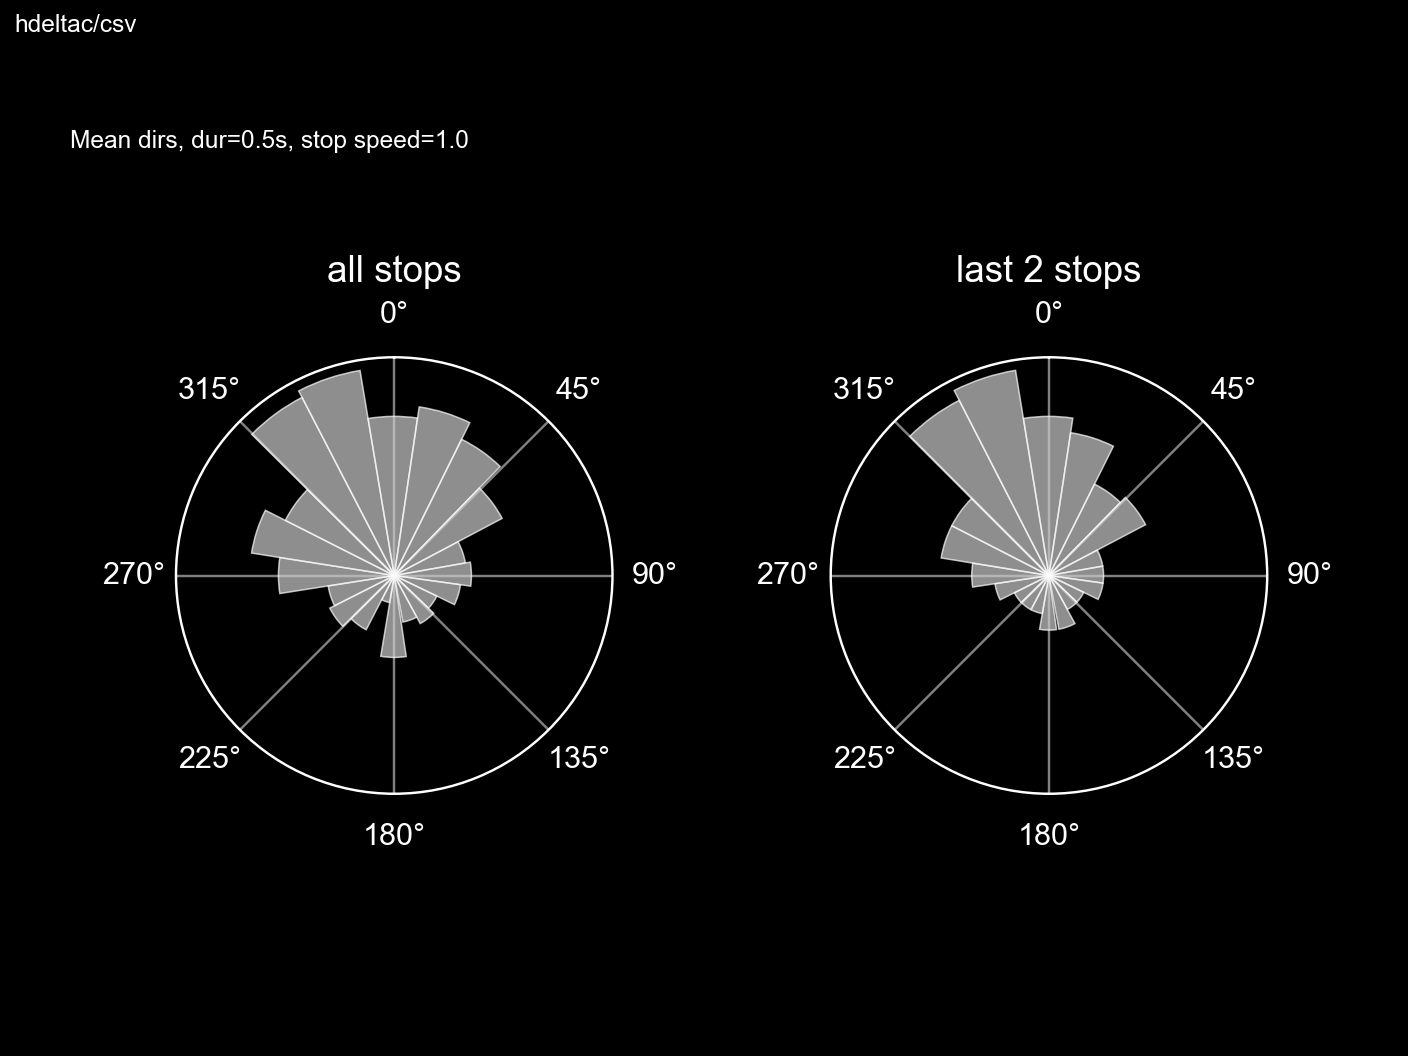

/Users/julianarhee/Documents/rutalab/data/figures/hdeltac/csv meandir_after_stop_outbouts_all-flies_polar


In [254]:
# Construct figure and axis to plot on
min_xwind_dist=3
nbins=20
fig, axn = pl.subplots(1, 2, subplot_kw=dict(projection='polar'))
meanangs_ = mdf[mdf['crosswind_dist'] >= min_xwind_dist].copy()
last_ = last_stops[last_stops['crosswind_dist'] >= min_xwind_dist].copy()
# Visualise by area of bins
ax =axn[0]
util.circular_hist(ax, np.deg2rad(mdf['meandir']), bins=nbins, 
                  facecolor=[0.8]*3)
pl.subplots_adjust(wspace=0.5, top=0.8)
ax.set_title('all stops')

ax =axn[1]
util.circular_hist(ax, np.deg2rad(last_['meandir']), bins=nbins, 
                  facecolor=[0.8]*3)
pl.subplots_adjust(wspace=0.5, top=0.8)
ax.set_title('last {} stops'.format(nstops_before))
# -------
title = 'Mean dirs, dur={:.1f}s, stop speed={:.1f}'\
            .format(stopdur_thresh, speed_thresh)
fig.text(0.05, 0.86, title, fontsize=8)
util.label_figure(fig, '{}'.format(experiment))

figname = 'meandir_after_stop_outbouts_all-flies_polar'
pl.savefig(os.path.join(save_dir, '{}.png'.format(figname)))
print(save_dir, figname)

<IPython.core.display.Javascript object>


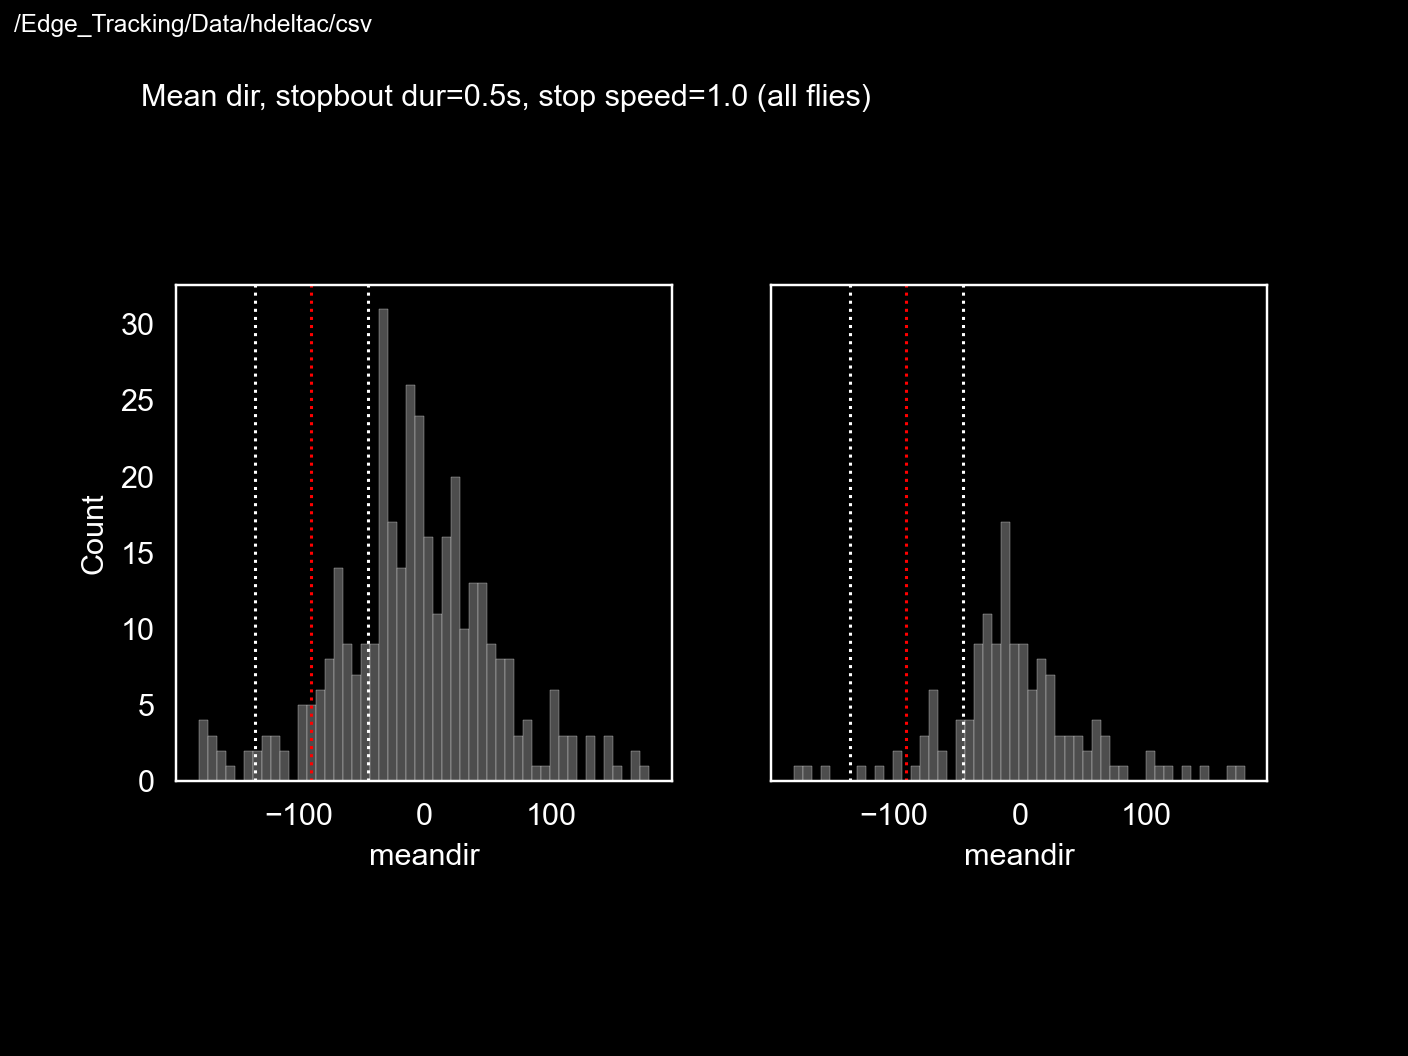

In [255]:
# Construct figure and axis to plot on
fig, axn = pl.subplots(1,2, sharex=True, sharey=True) #subplot_kw=dict(projection='polar'))
# Visualise by area of bins
ax=axn[0]
sns.histplot(data=mdf, x='meandir', bins=50, ax=ax,
                 edgecolor='w', linewidth=0.1, facecolor=[0.3]*3, alpha=0.5)
# ax.set_title(cond)
ax.axvline(x=-45, color='w', lw=1, linestyle=':')
ax.axvline(x=-135, color='w', lw=1, linestyle=':')
ax.axvline(x=-90, color='r', lw=1, linestyle=':')
ax.set_box_aspect(1)

ax=axn[1]
sns.histplot(data=last_stops, x='meandir', bins=50, ax=ax,
                 edgecolor='w', linewidth=0.1, facecolor=[0.3]*3, alpha=0.5)
# ax.set_title(cond)
ax.axvline(x=-45, color='w', lw=1, linestyle=':')
ax.axvline(x=-135, color='w', lw=1, linestyle=':')
ax.axvline(x=-90, color='r', lw=1, linestyle=':')
ax.set_box_aspect(1)

title = 'Mean dir, stopbout dur={:.1f}s, stop speed={:.1f} (all flies)'\
            .format(stopdur_thresh, speed_thresh)
fig.text(0.1, 0.9, title)

util.label_figure(fig, fig_id)
#figname = 'meandir_after_stop_outbouts_all-flies'
#pl.savefig(os.path.join(curr_savedir, '{}.png'.format(figname)))

<IPython.core.display.Javascript object>


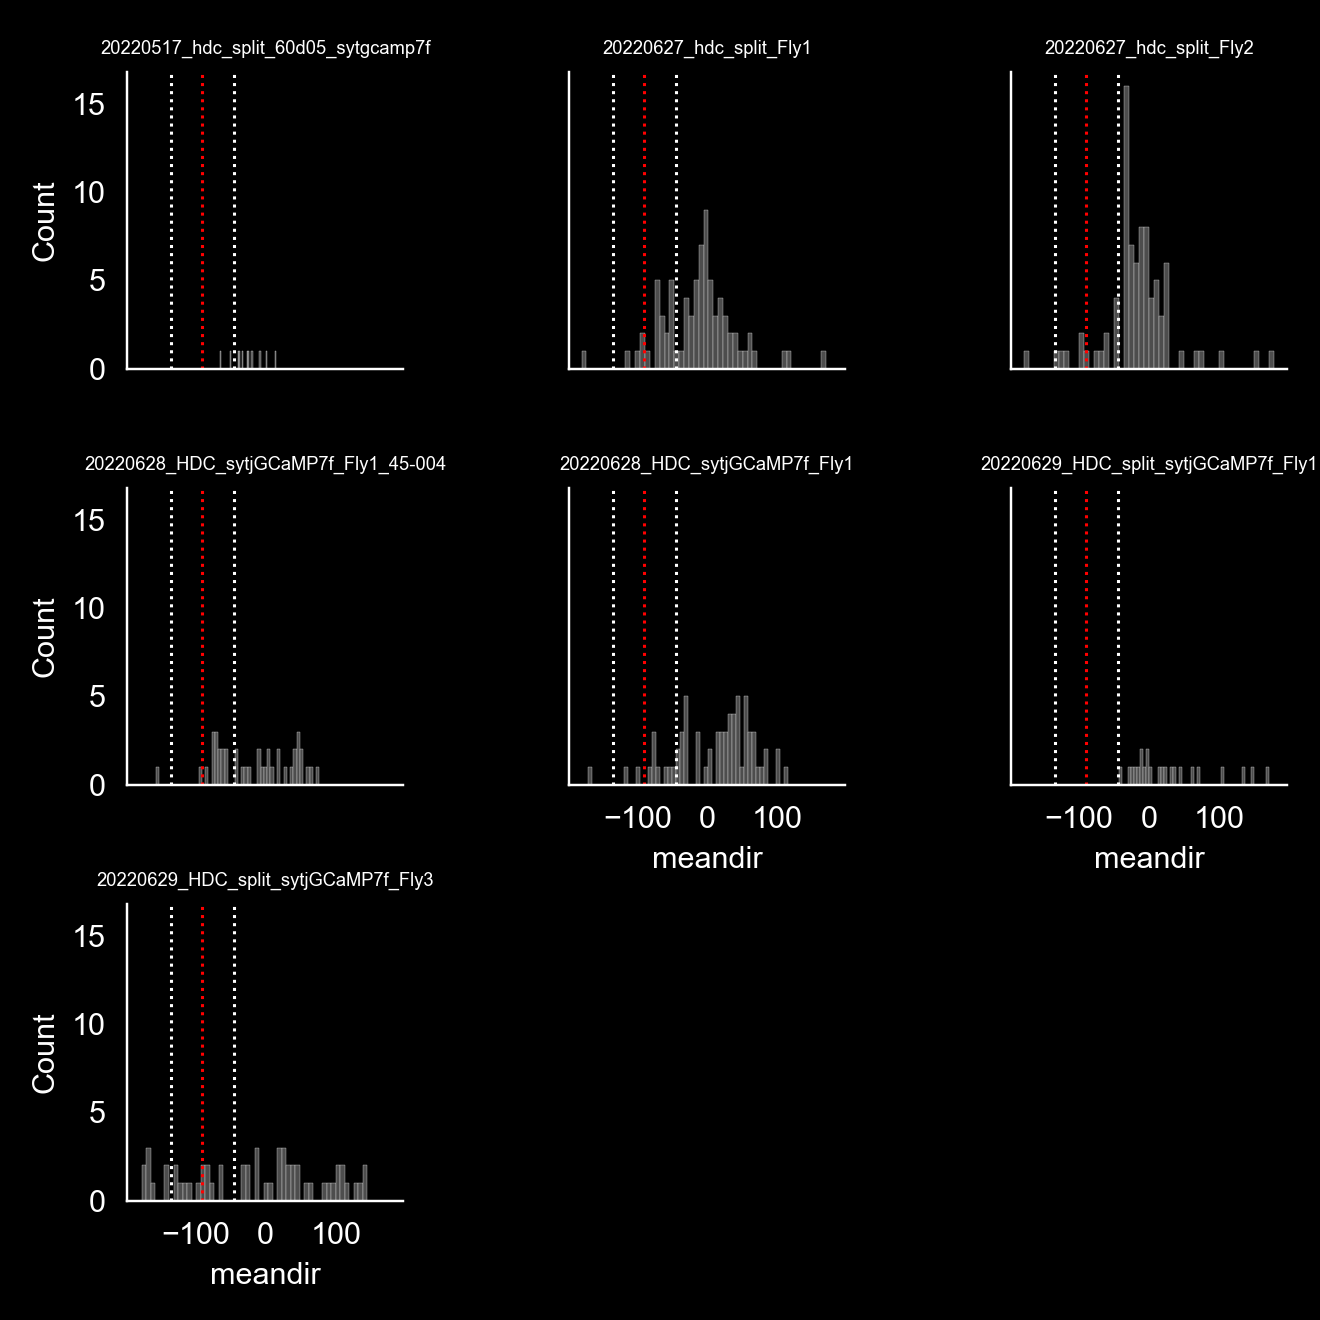

In [256]:
g = sns.FacetGrid(data=mdf, col='fly_id', col_wrap=3, height=2)
g.map_dataframe(sns.histplot, x='meandir', bins=50, ax=ax,
                 edgecolor='w', linewidth=0.1, facecolor=[0.3]*3, alpha=0.5)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}', size=6)

for ax in g.axes.flat:
    ax.axvline(x=-45, color='w', lw=1, linestyle=':')
    ax.axvline(x=-135, color='w', lw=1, linestyle=':')
    ax.axvline(x=-90, color='r', lw=1, linestyle=':')

pl.subplots_adjust(wspace=0.6)

# old way with vectors for visualization

## calculate stops

In [83]:
# # Calculate stops
# stop_thresh = 1.0
# df = butil.calculate_stops(df, stop_thresh=stop_thresh, speed_varname='smoothed_speed')
# df = butil.filter_bouts_by_dur(df, bout_thresh=0.1, bout_varname='stopbout', 
#                         count_varname='stopped', verbose=True)
# nstops = len(df[df['stopped']==True]['stopbout'].unique())
# nstops

In [85]:
fly_ids

array(['20220517_hdc_split_60d05_sytgcamp7f', '20220627_hdc_split_Fly1',
       '20220627_hdc_split_Fly2', '20220628_HDC_sytjGCaMP7f_Fly1',
       '20220628_HDC_sytjGCaMP7f_Fly1_45-004',
       '20220629_HDC_split_sytjGCaMP7f_Fly1',
       '20220629_HDC_split_sytjGCaMP7f_Fly3'], dtype=object)

In [147]:
fly_id = '20220517_hdc_split_60d05_sytgcamp7f'
df_ = df_fp0[df_fp0['fly_id']==fly_id].copy()

xvar='smoothed_ft_posx' if smooth else 'ft_posx'
yvar='smoothed_ft_posy' if smooth else 'ft_posy'

df_ = butil.add_rdp_by_bout(df_, epsilon=rdp_epsilon, xvar=xvar, yvar=yvar)
df_ = butil.get_speed_and_stops(df_, speed_thresh=1.0, stopdur_thresh=0.5)

In [151]:
df_.columns

Index(['ft_posx', 'ft_posy', 'time', 'instrip', 'Unnamed: 0', 'x', 'y',
       'seconds', 'heading', 'offset_phase_eb', 'offset_phase_fb_upper',
       'offset_phase_fb_lower', 'fitted_amplitude_eb',
       'fitted_amplitude_fb_upper', 'fitted_amplitude_fb_lower',
       'fitted_baseline_eb', 'fitted_baseline_fb_upper',
       'fitted_baseline_fb_lower', 'wedges_eb', 'wedges_fb_upper',
       'wedges_fb_lower', 'fly_id', 'condition', 'boutnum', 'rel_time',
       'cum_time', 'speed', 'upwind_speed', 'crosswind_speed', 'euclid_dist',
       'upwind_dist', 'crosswind_dist', 'trial_id', 'flipped',
       'rdp_smoothed_ft_posx', 'rdp_smoothed_ft_posy', 'rdp_ft_posx',
       'rdp_ft_posy', 'stopped', 'stopboutnum'],
      dtype='object')

In [152]:
# stopbout_durs = butil.get_bout_durs(df[df['stopped']], bout_varname='stopbout')
stopdurs = butil.get_bout_durs(df_[df_['stopped']], bout_varname='stopboutnum')
# Get durs & dists
stopbouts = pd.DataFrame(data=stopdurs.values(), index=stopdurs.keys(), 
                        columns=['duration'])
stopbouts['instrip'] = [df_[df_['stopboutnum']==i]['instrip'].unique()[0] \
                        for i in stopbouts.index.tolist()]
stopbouts['boutnum'] = [df_[df_['stopboutnum']==i]['boutnum'].unique()[0] \
                        for i in stopbouts.index.tolist()]
stopbouts['distance'] = None
for k, v in stopdurs.items():
    s_ = df_[(df_['stopped']) & (df_['stopboutnum']==k)]
    stopbouts.loc[k, 'distance'] = s_['upwind_dist'].sum()

In [154]:
# window_size=5
# df_['smoothed_ft_posx'] = util.smooth_timecourse(df_['ft_posx'], window_size)
# df_['smoothed_ft_posy'] = util.smooth_timecourse(df_['ft_posy'], window_size)

<IPython.core.display.Javascript object>


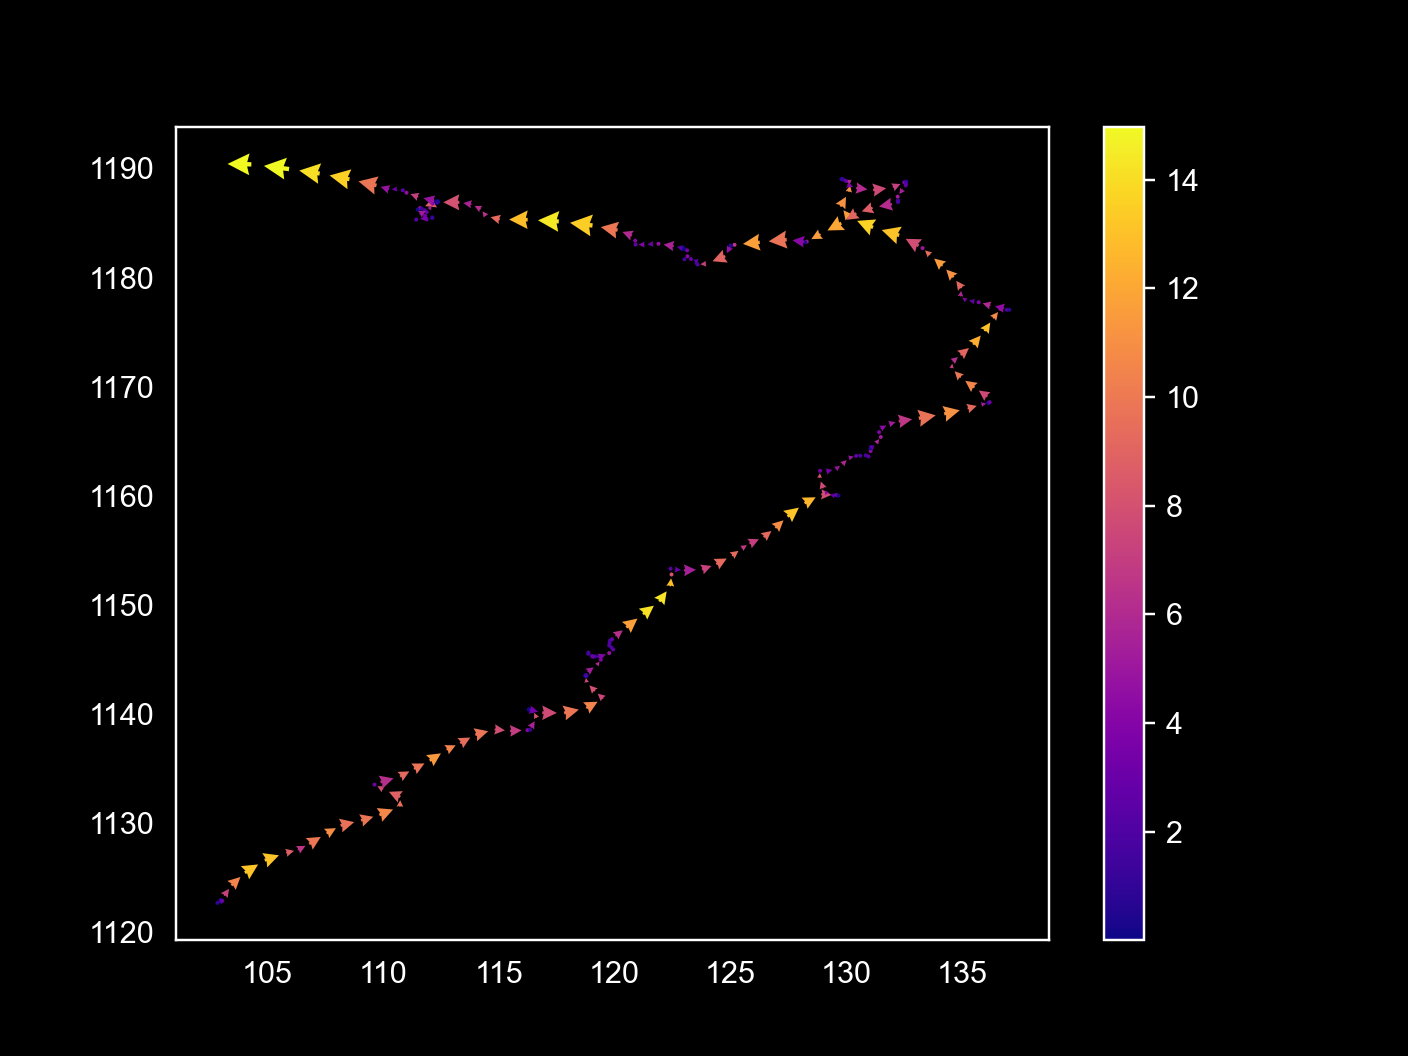

<AxesSubplot: >

In [183]:
stop_lc='white'
xvar='smoothed_ft_posx'
yvar='smoothed_ft_posy'
hue_param='speed'
global_colorscale=False
colormap = mpl.cm.plasma
colors=df_[hue_param]
# 
boutnum = 15
b_ = df_.groupby(['boutnum']).get_group(boutnum)
trial_id = b_['trial_id'].unique()[0]
vmin, vmax = b_[~b_['instrip']][hue_param].min(), b_[~b_['instrip']][hue_param].max()
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

def plot_vector_path(ax, x, y, c,
                    colormap=mpl.cm.plasma, vmin=None, vmax=None):
    if vmin is None:
        #vmin, vmax = b_[hue_param].min(), b_[hue_param].max()
        vmin, vmax = c.min(), c.max()
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    #colors=b_[hue_param]
#     uu = b_['ft_posx'].shift(periods=-1) - b_['ft_posx']
#     vv = b_['ft_posy'].shift(periods=-1) - b_['ft_posy']
#     ax.quiver(b_['ft_posx'].values, b_['ft_posy'].values, uu, vv, color=colormap(norm(colors)), 
#               angles='xy', scale_units='xy', scale=1.5)
    uu = np.roll(x, -1) - x # b_['ft_posx']
    vv = np.roll(y, -1) - y #b_['ft_posy'].shift(periods=-1) - b_['ft_posy']
    uu[-1]=np.nan
    vv[-1]=np.nan
    ax.quiver(x, y, uu, vv, color=colormap(norm(c)), 
              angles='xy', scale_units='xy', scale=1.5, width=0.005, headwidth=5)
    util.colorbar_from_mappable(ax, norm, cmap=colormap, hue_title='color')
    return ax

fig, ax =pl.subplots()
x = b_['ft_posx'].values
y = b_['ft_posy'].values
c = b_[hue_param].values
util.plot_vector_path(ax, b_['ft_posx'].values, b_['ft_posy'].values, 
                      b_[hue_param].values, vmin=None, vmax=None)

#ax.plot(df_['smoothed_x'] ,df_['smoothed_y'], lw=0.5, color='w')
#ax.plot(b_['ft_posx'], b_['ft_posy'], lw=1, color='w', ls=':')

In [281]:
fly_id = '20220517_hdc_split_60d05_sytgcamp7f'
df_ = df_fp0[df_fp0['fly_id']==fly_id].copy()

xvar='smoothed_ft_posx' if smooth else 'ft_posx'
yvar='smoothed_ft_posy' if smooth else 'ft_posy'

df_ = butil.add_rdp_by_bout(df_, epsilon=rdp_epsilon, xvar=xvar, yvar=yvar)
df_ = butil.get_speed_and_stops(df_, speed_thresh=1.0, stopdur_thresh=0.5)

In [282]:
bnum = 15
b_ = df_[df_['boutnum']==bnum].copy()
b_.shape

(335, 38)

In [284]:
b_.columns

Index(['ft_posx', 'ft_posy', 'time', 'instrip', 'Unnamed: 0', 'x', 'y',
       'seconds', 'heading', 'offset_phase_eb', 'offset_phase_fb_upper',
       'offset_phase_fb_lower', 'fitted_amplitude_eb',
       'fitted_amplitude_fb_upper', 'fitted_amplitude_fb_lower',
       'fitted_baseline_eb', 'fitted_baseline_fb_upper',
       'fitted_baseline_fb_lower', 'wedges_eb', 'wedges_fb_upper',
       'wedges_fb_lower', 'fly_id', 'condition', 'boutnum', 'rel_time',
       'cum_time', 'speed', 'upwind_speed', 'crosswind_speed', 'euclid_dist',
       'upwind_dist', 'crosswind_dist', 'trial_id', 'flipped', 'rdp_ft_posx',
       'rdp_ft_posy', 'stopped', 'stopboutnum'],
      dtype='object')

<IPython.core.display.Javascript object>


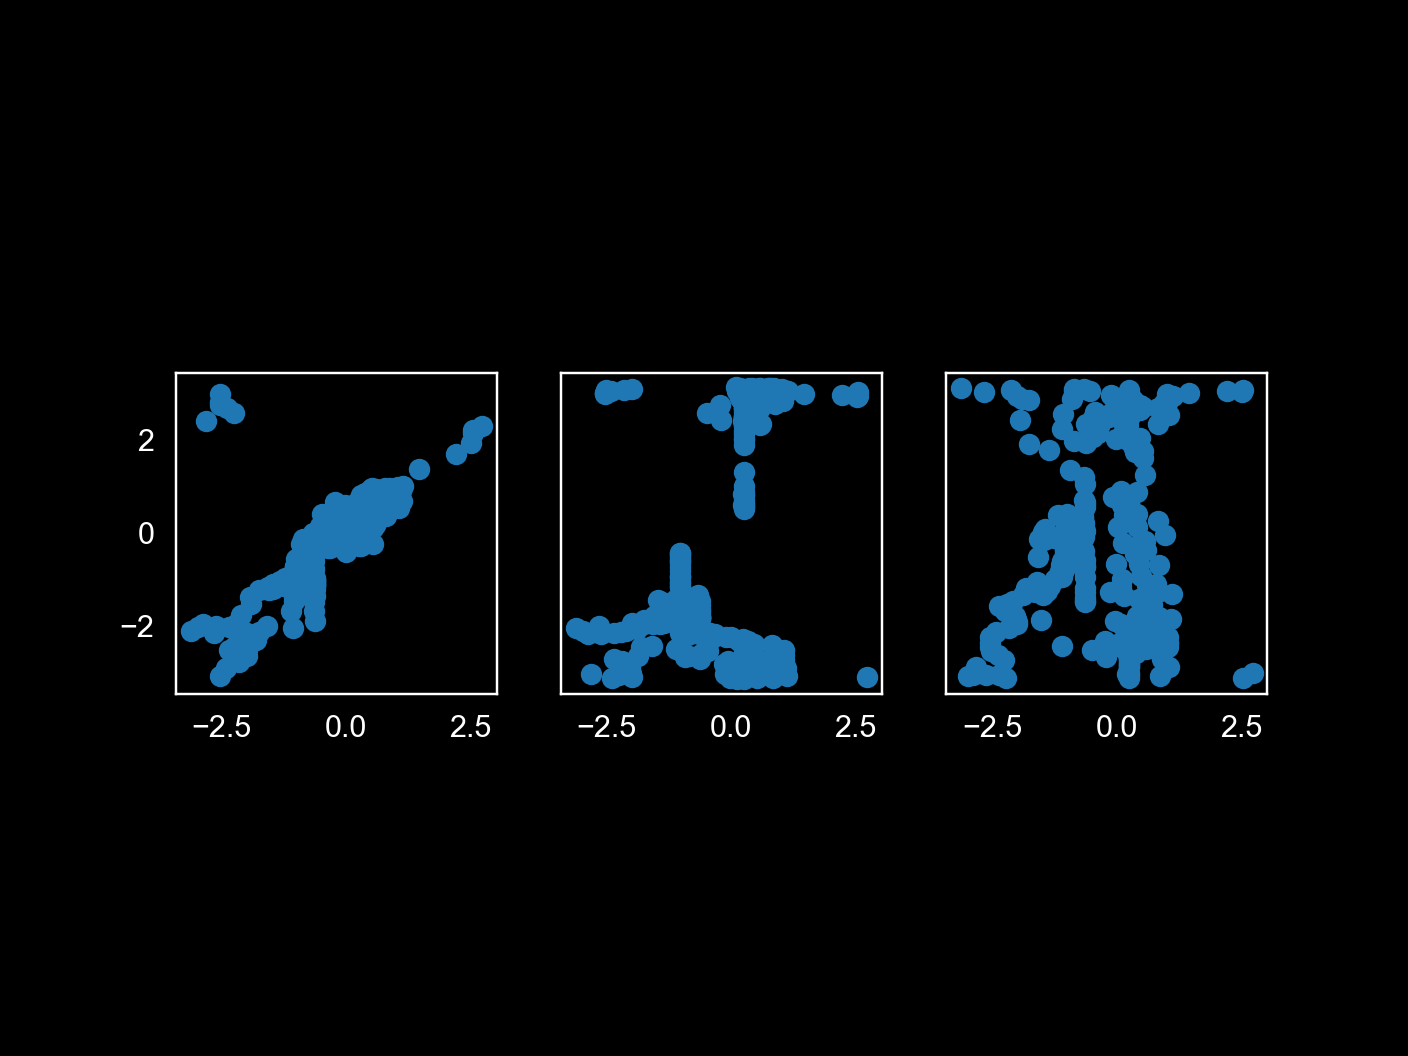

In [289]:
fig, axn = pl.subplots(1, 3, sharex=True, sharey=True)
varnames=['offset_phase_{}'.format(v) for v in ['eb', 'fb_upper', 'fb_lower']]
for ax, varname in zip(axn.flat, varnames):
    ax.scatter(b_['heading'], b_[varname])
    ax.set_box_aspect(1)

In [292]:
b_.columns

Index(['ft_posx', 'ft_posy', 'time', 'instrip', 'Unnamed: 0', 'x', 'y',
       'seconds', 'heading', 'offset_phase_eb', 'offset_phase_fb_upper',
       'offset_phase_fb_lower', 'fitted_amplitude_eb',
       'fitted_amplitude_fb_upper', 'fitted_amplitude_fb_lower',
       'fitted_baseline_eb', 'fitted_baseline_fb_upper',
       'fitted_baseline_fb_lower', 'wedges_eb', 'wedges_fb_upper',
       'wedges_fb_lower', 'fly_id', 'condition', 'boutnum', 'rel_time',
       'cum_time', 'speed', 'upwind_speed', 'crosswind_speed', 'euclid_dist',
       'upwind_dist', 'crosswind_dist', 'trial_id', 'flipped', 'rdp_ft_posx',
       'rdp_ft_posy', 'stopped', 'stopboutnum'],
      dtype='object')

In [296]:
theta_range

(-3.141592653589793, 3.141592653589793)

/var/folders/6z/bhycp6jj4pxg1qt6h_j36h880000gn/T/ipykernel_26604/3710135500.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axn = pl.subplots(1, 3, sharex=True, sharey=True)


<IPython.core.display.Javascript object>


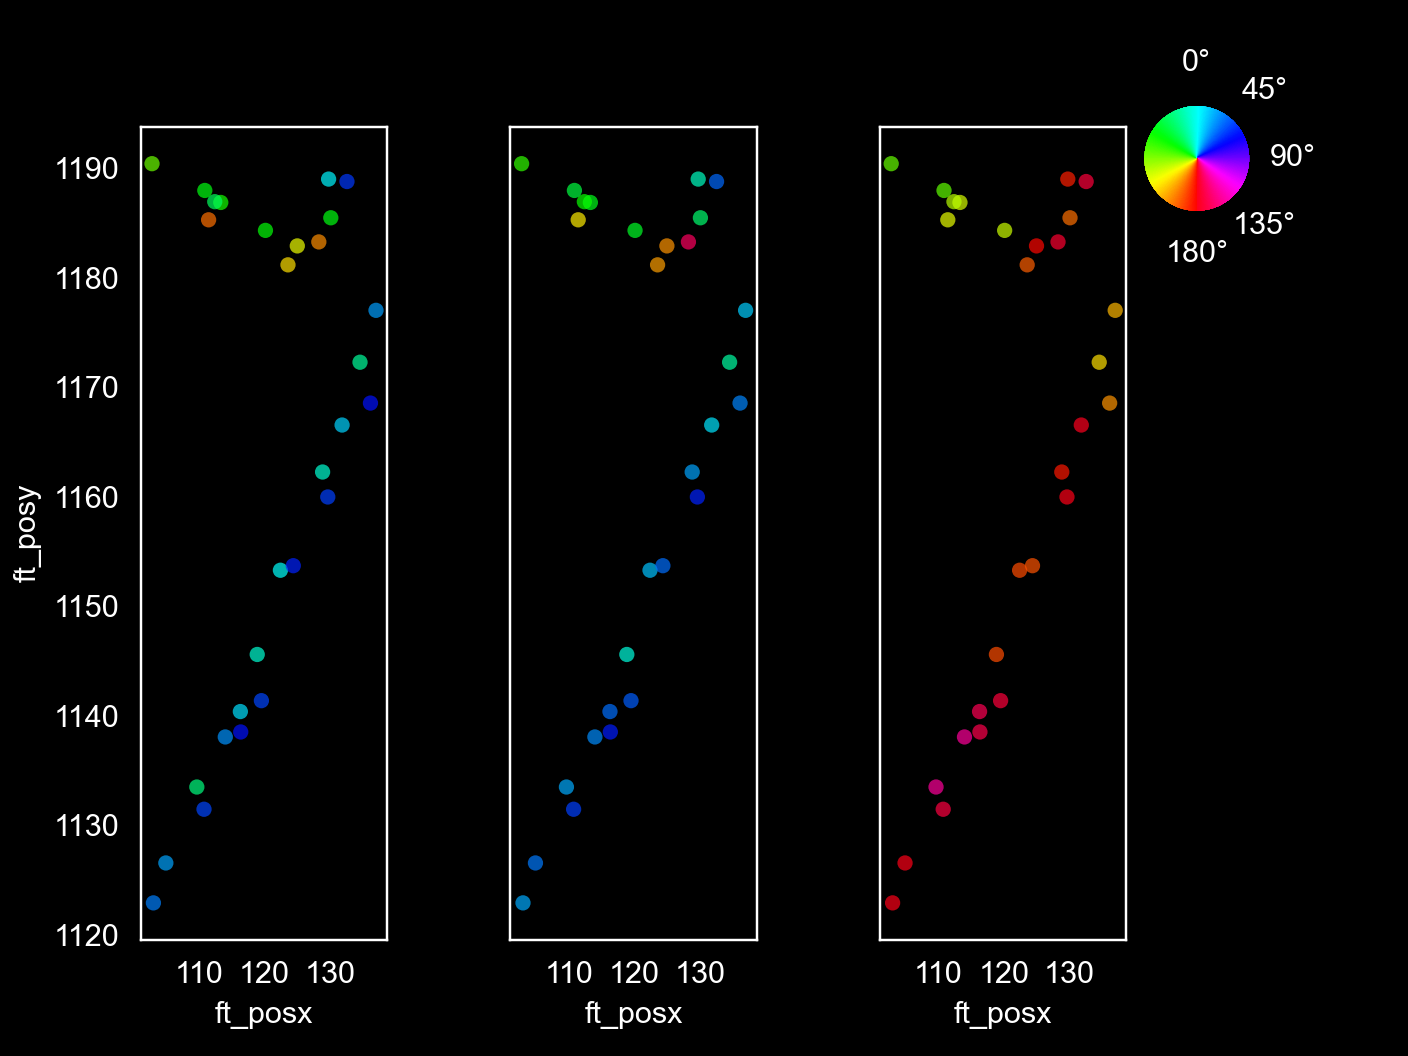

In [306]:
fig, axn = pl.subplots(1, 3, sharex=True, sharey=True)
theta_norm = mpl.colors.Normalize(theta_range[0], theta_range[1])
rdp_var = 'rdp_{}'.format(xvar)
ax=axn[0]
ax = butil.plot_bout(b_[b_[rdp_var]], ax, hue_var='heading', norm=theta_norm, cmap=theta_cmap,
                markersize=25, plot_legend=False)
ax=axn[1]
hue_var='offset_phase_eb'
ax = butil.plot_bout(b_[b_[rdp_var]], ax, hue_var=hue_var, norm=theta_norm, cmap=theta_cmap,
                markersize=25, plot_legend=False)
ax=axn[2]
hue_var='offset_phase_fb_upper'
ax = butil.plot_bout(b_[b_[rdp_var]], ax, hue_var=hue_var, norm=theta_norm, cmap=theta_cmap,
                markersize=25, plot_legend=False)

wheel_axis = [0.8, 0.8, 0.1, 0.1]
cax = util.add_colorwheel(fig, axes=wheel_axis, 
                    theta_range=theta_range, cmap=theta_cmap) 
pl.subplots_adjust(left=0.1, right=0.8, wspace=0.5)

In [313]:
b_.columns

Index(['ft_posx', 'ft_posy', 'time', 'instrip', 'Unnamed: 0', 'x', 'y',
       'seconds', 'heading', 'offset_phase_eb', 'offset_phase_fb_upper',
       'offset_phase_fb_lower', 'fitted_amplitude_eb',
       'fitted_amplitude_fb_upper', 'fitted_amplitude_fb_lower',
       'fitted_baseline_eb', 'fitted_baseline_fb_upper',
       'fitted_baseline_fb_lower', 'wedges_eb', 'wedges_fb_upper',
       'wedges_fb_lower', 'fly_id', 'condition', 'boutnum', 'rel_time',
       'cum_time', 'speed', 'upwind_speed', 'crosswind_speed', 'euclid_dist',
       'upwind_dist', 'crosswind_dist', 'trial_id', 'flipped', 'rdp_ft_posx',
       'rdp_ft_posy', 'stopped', 'stopboutnum'],
      dtype='object')

In [307]:
smooth = False
xvar='smoothed_ft_posx' if smooth else 'ft_posx'
yvar='smoothed_ft_posy' if smooth else 'ft_posy'
smooth_window=11
rdp_epsilon=1 #0.5 # distance unit (usually, 1mm)
speed_thresh=1.0
stopdur_thresh=0.5
heading_var ='heading'
theta_range=(-np.pi, np.pi)
# ----------------------------------------------------
d_list=[]
m_list=[]
for trial_id, df_ in df_fp0.groupby('trial_id'):
    trial_id = df_['trial_id'].unique()[0]
    oparams = butil.get_odor_params(df_) #[df1['condition']==cond])
    df_ = df_[df_['time']>=oparams['odor_start_time']].copy()
    # process df
    df_ = butil.smooth_traces(df_, window_size=smooth_window, return_same=True)
    df_ = butil.add_rdp_by_bout(df_, epsilon=rdp_epsilon, xvar=xvar, yvar=yvar)
    # get mean dur after stops
    df_ = butil.get_speed_and_stops(df_, speed_thresh=speed_thresh, stopdur_thresh=stopdur_thresh)
    meandirs = butil.mean_dir_after_stop(df_, theta_range=theta_range, heading_var=heading_var)
    m_list.append(meandirs)
    d_list.append(df_)
mdf = pd.concat(m_list).reset_index(drop=True)
df_proc = pd.concat(d_list).reset_index(drop=True)

In [308]:
mdf['is_last'] = False
d_list = []
for (trial_id, bnum), df_ in mdf.groupby(['trial_id', 'boutnum']):
    #last_stop = df_['stopboutnum'].max()
    last_ = df_.sort_values(by=['stopboutnum'],ascending=True).iloc[-2:]
#     meandir = df_.iloc[last_ix]['meandir']
#     xwind_speed = df_.iloc[last_ix]['meandir']
    d_list.append(last_) #df_.iloc[last_ix])
    mdf.loc[last_.index, 'is_last'] = True
last_stops = pd.concat(d_list, axis=0)
for v in ['crosswind_dist', 'meandir']:
    last_stops[v] = last_stops[v].astype(float)
last_stops.head()

fly_id  \
0  20220517_hdc_split_60d05_sytgcamp7f   
1  20220517_hdc_split_60d05_sytgcamp7f   
2  20220517_hdc_split_60d05_sytgcamp7f   
3  20220517_hdc_split_60d05_sytgcamp7f   
4  20220517_hdc_split_60d05_sytgcamp7f   

                                        trial_id  condition  boutnum  \
0  20220517_hdc_split_60d05_sytgcamp7f_stripgrid  stripgrid        3   
1  20220517_hdc_split_60d05_sytgcamp7f_stripgrid  stripgrid        3   
2  20220517_hdc_split_60d05_sytgcamp7f_stripgrid  stripgrid        7   
3  20220517_hdc_split_60d05_sytgcamp7f_stripgrid  stripgrid        9   
4  20220517_hdc_split_60d05_sytgcamp7f_stripgrid  stripgrid        9   

   crosswind_dist  stopboutnum  instrip    meandir  is_last  
0       11.221747            2    False -23.748146    False  
1       11.221747            4    False -49.596655    False  
2       17.389027            6    False   2.477453    False  
3       20.715938            8    False  -8.575540    False  
4       20.715938           10    False -26.099284    False

<IPython.core.display.Javascript object>


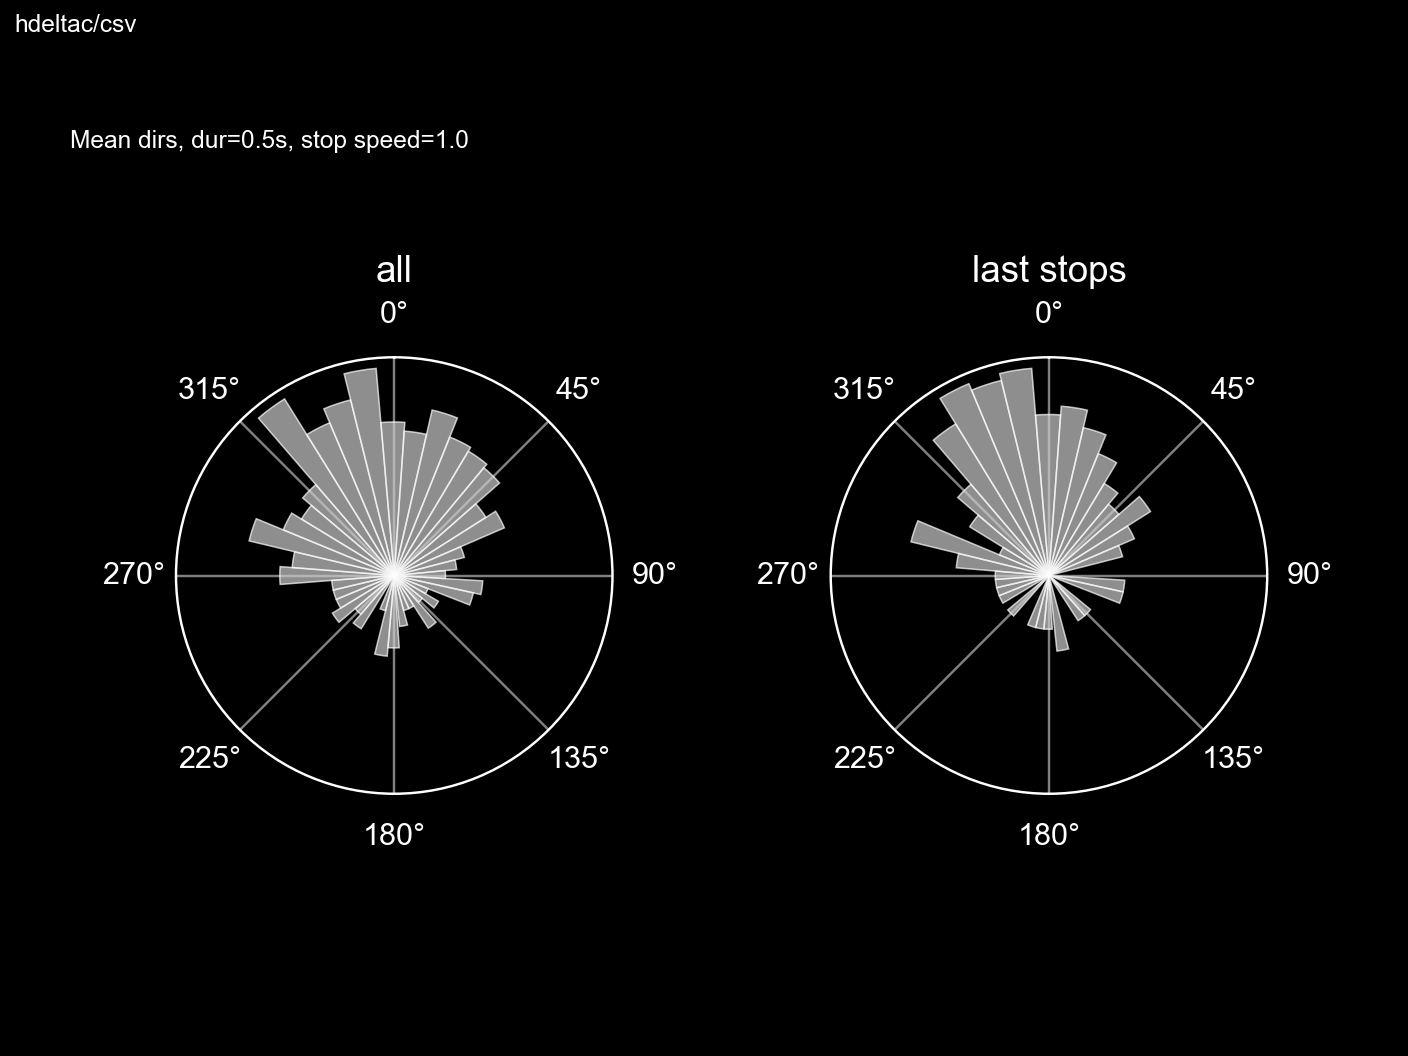

In [310]:
# Construct figure and axis to plot on
min_xwind_dist=3.0
fig, axn = pl.subplots(1, 2, subplot_kw=dict(projection='polar'))
# Visualise by area of bins
ax =axn[0]
util.circular_hist(ax, np.deg2rad(mdf['meandir']), bins=40, 
                  facecolor=[0.8]*3)
pl.subplots_adjust(wspace=0.5, top=0.8)
ax.set_title('all')
ax =axn[1]
util.circular_hist(ax, np.deg2rad(last_stops['meandir']), bins=40, 
                  facecolor=[0.8]*3)
pl.subplots_adjust(wspace=0.5, top=0.8)
ax.set_title('last stops')
# -------
title = 'Mean dirs, dur={:.1f}s, stop speed={:.1f}'\
            .format(stopdur_thresh, speed_thresh)
fig.text(0.05, 0.86, title, fontsize=8)
util.label_figure(fig, '{}'.format(experiment))

In [312]:
mdf.shape

(361, 9)